# Notebook d'Analyses
### Sommaire :
- [A - Analyse Univariée](#A)
	- [A.1 - Variables "Générales"](#A.1)
	- [A.2 - Variables "Groupes d'Aliments"](#A.2)
	- [A.3 - Variables Nutriments](#A.3)
	- [A.4 - Variables Energies](#A.4)
	- [A.5 - Variables Score Nutritionnel](#A.5)
- [B - Analyse Bivariée](#B)
	- [B.1 - Quantitatives x Quantitatives](#B.1)
	- [B.2 - Quantitatives x Qualitatives (y.c ANOVA)](#B.2)
        - [B.2.a - Introduction à l'ANOVA et préparation des données](#B.2.a)
        - [B.2.b - Energie](#B.2.b)
        - [B.2.c - Nutriments](#B.2.c)
            - [B.2.c.1 - Saturated Fat](#B.2.c.1)
            - [B.2.c.2 - Sugars](#B.2.c.2)
            - [B.2.c.3 - Salt](#B.2.c.3)
            - [B.2.c.4 - Fibers](#B.2.c.4)
	- [B.3 - Qualitatives x Qualitatives(y.c Chi2)](#B.3)
- [C- Analyse Multivariée : ACP - Nutriments & Energie](#C)
- [D- Prototypage Application](#D)
## Importation des bibliothèques

In [268]:
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import seaborn as sns
import datetime

In [269]:
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

## Importation des données

In [270]:
data = pd.read_csv("Data\data_clean.csv", low_memory=False)

In [271]:
data

,code,delta_jours_actu,product_name,brands,pnns_groups_1,pnns_groups_2,nova_group,glycemic-index_100g,classe_ig,fiber_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,energy-kcal_100g,nutriscore_score,nutriscore_grade
0,3760020503628,63,Karéléa speculos,Lea Nature,unknown,unknown,4.0,NaN,NaN,1.5,15.0,4.0,70.0,0.0,7.8,0.4600,426.00,1.0,b
1,4060800002211,63,Diet Pepsi,Pepsi,unknown,unknown,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,8.0,5.0000,1.00,NaN,NaN
2,3256220211291,63,Petit Beurre,U,Sugary snacks,Biscuits and cakes,4.0,NaN,NaN,3.0,15.0,8.8,72.0,22.0,8.2,0.9000,457.00,17.0,d
3,4056489209980,63,Muesli croustillant aux fruits,Crownfield,Cereals and potatoes,Breakfast cereals,4.0,NaN,NaN,5.8,15.3,8.3,62.7,23.7,8.0,0.2300,434.00,14.0,d
4,3760039408938,63,Halva Pistache,NaN,unknown,unknown,NaN,NaN,NaN,NaN,27.8,3.8,53.0,46.3,9.4,0.2000,513.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599423,2000000000196,3234,Coeurs d'artichauts,King's Crown,Fruits and vegetables,Vegetables,3.0,NaN,NaN,NaN,0.1,NaN,12.2,NaN,2.4,NaN,58.99,NaN,NaN
599424,3449864002213,3238,Quart Pré-Tranché,Aoste,Fish Meat Eggs,Processed meat,3.0,NaN,NaN,NaN,19.0,7.8,1.0,1.0,27.0,5.5118,281.60,20.0,e
599425,4005514170528,3294,Pâté aux herbes,Tartex,unknown,unknown,3.0,NaN,NaN,NaN,16.0,NaN,6.0,NaN,7.0,NaN,194.18,NaN,NaN
599426,4005514171303,3295,Pâté Shiitake,Tartex,unknown,unknown,3.0,NaN,NaN,NaN,17.9,NaN,6.4,NaN,7.0,NaN,212.57,NaN,NaN


## A - Analyse Univariée <a name="A"></a>
###  A.1 - Variables "Générales" <a name="A.1"></a>
#### delta_jours_actu :
Variable créée en faisant la différence entre la date du jour de l'analyse et la variable "last_modified_datetime". Elle représente donc le temps qui s'est écoulé entre la date de la dernière modification et la date de l'analyse, en jours.

In [272]:
data['delta_jours_actu'].describe()

count    599428.000000
mean        482.113730
std         354.974289
min          63.000000
25%         181.000000
50%         414.000000
75%         694.000000
max        3351.000000
Name: delta_jours_actu, dtype: float64

Text(0.5, 1.0, 'delta_jours_actu')

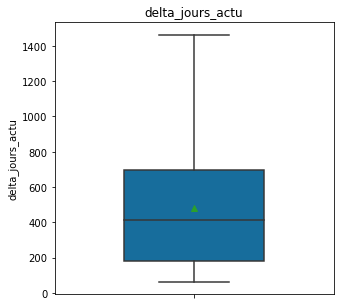

In [273]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='delta_jours_actu', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title("delta_jours_actu")

##### Histogramme :

<AxesSubplot:xlabel='delta_jours_actu', ylabel='Count'>

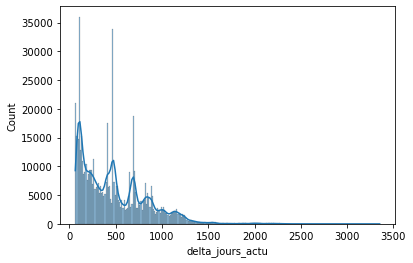

In [274]:
sns.histplot(data=data['delta_jours_actu'], kde=True)

La formule de base produit un graphique peut lisible. On peut pour améliorer la lisibilité, définir un nombre de classe. Pour définir le nombre de classe optimal, on utilise [la formule de Yule](https://fr.wikipedia.org/wiki/R%C3%A8gle_de_Sturges#Critique), en effet on voit bien que la distribution est asymétrique et présente des valeurs largement étalées, la formule de Sturges n'est donc pas optimale.

In [275]:
def nbinsYule(d):
    return int(2.5*(len(d.isna()==False))**(1/4))

In [276]:
nbinsYule(data['delta_jours_actu'])

69

In [277]:
#détermination du nombre de classes de l'histogramme à l'aide de la formule de Yule
nbins=nbinsYule(data['delta_jours_actu'])
nbins

69

<AxesSubplot:xlabel='delta_jours_actu', ylabel='Count'>

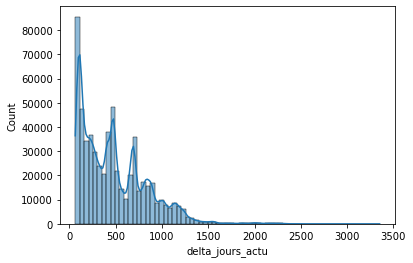

In [278]:
sns.histplot(data=data['delta_jours_actu'], bins=nbins, kde=True)

Ce deuxième histogramme est bien plus lisible.

#### product_name :

In [279]:
data['product_name'].describe()

count     597619
unique    418272
top        Comté
freq         792
Name: product_name, dtype: object

On remarque que certains noms de produits sont répétés, par exemple le Comté est présent 792 fois.

#### brands :
Cette variable porte sur la marque du produit.

In [280]:
data['brands'].describe()

count     348997
unique     58081
top       Auchan
freq        8156
Name: brands, dtype: object

In [281]:
#on créer une fonction qui renvoie un dataframe contenant les différentes modalités d'une colonne ainsi que le nombre de fois
#qu'elles apparaissent ainsi que leur fréquence d'apparition
def moda(df,col):
    eff = df[col].value_counts() #on comptes le nombre de valeurs dans la colonne
    moda = eff.index #on récupères les modalités que prends la variable

    tabModa = pd.DataFrame(moda, columns = [col]) #on crée un DataFrame avec toutes les modalités de la variable
    tabModa["n"] = eff.values #On ajoute une colonne au DataFrame contenant le nombre d'occurence de la modalité
    tabModa["f"] = tabModa["n"]/sum(tabModa["n"])*100 #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
    return tabModa

In [282]:
moda(data,"brands")

,brands,n,f
0,Auchan,8156,2.336983
1,Carrefour,7388,2.116924
2,U,4855,1.391129
3,Casino,4041,1.157890
4,Leader Price,3712,1.063619
...,...,...,...
58076,Softiz,1,0.000287
58077,Chocolat Frey AG,1,0.000287
58078,les fruits Gervasoni,1,0.000287
58079,Adrien Vacher,1,0.000287


In [283]:
print("On observes donc",len(moda(data,"brands")),"marques différentes")

On observes donc 58081 marques différentes


Les 10 marques les plus observées sont :

In [284]:
moda(data,"brands").head(10)

,brands,n,f
0,Auchan,8156,2.336983
1,Carrefour,7388,2.116924
2,U,4855,1.391129
3,Casino,4041,1.157890
4,Leader Price,3712,1.063619
5,Cora,2882,0.825795
6,Picard,2237,0.640980
7,Nestlé,2200,0.630378
8,Monoprix,1974,0.565621
9,Thiriet,1871,0.536108


### A.2 - Variables "Groupes d'Aliments" <a name="A.2"></a>

#### pnns_groups_1 :

In [285]:
#On normalise les modalités de cette colonne afin d'éviter des doublons de modalités à cause de la présence de '-' ou à cause
#des majuscules/minuscules
data["pnns_groups_1"]=data["pnns_groups_1"].str.replace('-', ' ', regex=True)
data["pnns_groups_1"]=data["pnns_groups_1"].str.title()

In [286]:
tabPnns1=moda(data,"pnns_groups_1")
tabPnns1

,pnns_groups_1,n,f
0,Unknown,334680,55.971890
1,Sugary Snacks,57330,9.587870
2,Fish Meat Eggs,40622,6.793624
3,Milk And Dairy Products,33986,5.683819
4,Cereals And Potatoes,26826,4.486381
5,Composite Foods,25366,4.242210
6,Beverages,21172,3.540806
7,Fat And Sauces,20540,3.435110
8,Fruits And Vegetables,19090,3.192612
9,Salty Snacks,18331,3.065677


On remarques la présence d'une modalité 'Unknown', représentant la majorité des individus. On va donc afficher la répartition des modalités de 'pnns_groups_1' en retirant la modalité 'Unknown' afin de voir la répartition des modalités 'connues':

([<matplotlib.patches.Wedge at 0x263a29bed30>,
 [Text(0.9299589945825191, 0.7584037634367795, 'Sugary Snacks'),
  Text(-0.3341956794077763, 1.1525247276588797, 'Fish Meat Eggs'),
  Text(-1.106089506520433, 0.465366526047357, 'Milk And Dairy Products'),
  Text(-1.1362435212360233, -0.3859412655432985, 'Cereals And Potatoes'),
  Text(-0.6977663362621901, -0.9762797447346947, 'Composite Foods'),
  Text(-0.07816724273594086, -1.197451411190893, 'Beverages'),
  Text(0.5030527688093769, -1.0894668016021505, 'Fat And Sauces'),
  Text(0.9440746226803859, -0.7407584672556145, 'Fruits And Vegetables'),
  Text(1.1714036246597004, -0.26041034567412313, 'Salty Snacks')],
 [Text(0.5424760801731361, 0.4424021953381213, '21.8%'),
  Text(-0.19494747965453613, 0.6723060911343465, '15.4%'),
  Text(-0.6452188788035857, 0.2714638068609582, '12.9%'),
  Text(-0.6628087207210135, -0.22513240490025746, '10.2%'),
  Text(-0.4070303628196108, -0.5694965177619051, '9.6%'),
  Text(-0.04559755826263217, -0.698513323

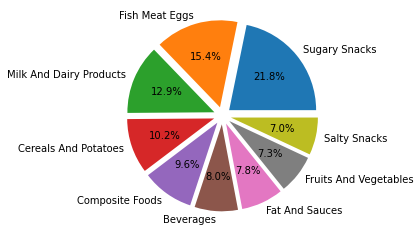

In [287]:
tabPnns1=tabPnns1[tabPnns1['pnns_groups_1']!='Unknown']
plt.pie(tabPnns1["n"], labels=tabPnns1["pnns_groups_1"], explode=[0.1]*len(tabPnns1), normalize = True, autopct="%.1f%%")

#### pnns_groups_2 :

In [288]:
#on normalise les modalités de la colonne
data["pnns_groups_2"]=data["pnns_groups_2"].str.title()

In [289]:
tabPnns2=moda(data,'pnns_groups_2')
tabPnns2

,pnns_groups_2,n,f
0,Unknown,334680,55.833228
1,Biscuits And Cakes,24344,4.061205
2,Sweets,21467,3.581247
3,One-Dish Meals,21007,3.504508
4,Processed Meat,17029,2.840875
5,Cheese,16819,2.805842
6,Dressings And Sauces,13332,2.224120
7,Cereals,12071,2.013753
8,Meat,11451,1.910321
9,Fish And Seafood,10287,1.716136


Comme pour 'pnns_groups_1', on va retirer la modalité 'Unknown' pour visualiser la répartition des modalités. Aussi comme la colonne présente 40 modalités, on va visualiser la répartition via un diagramme en barre pour faciliter la lecture.

In [290]:
tabPnns2=tabPnns2[tabPnns2['pnns_groups_2']!='Unknown']

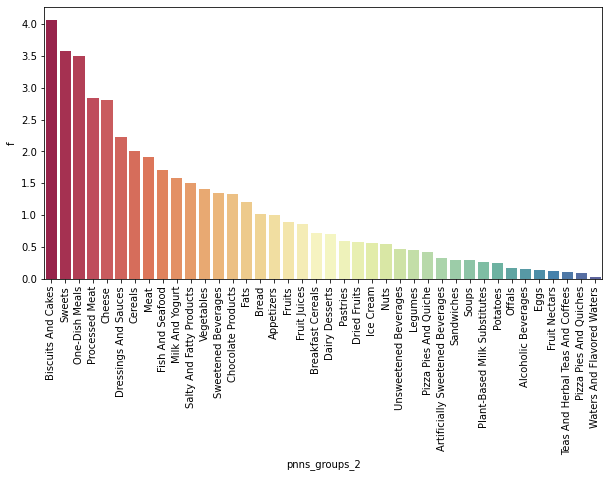

In [291]:
plt.figure(figsize=(10,5))
bp=sns.barplot(x=tabPnns2['pnns_groups_2'],y=tabPnns2['f'],palette='Spectral')
bp.set_xticklabels(labels=tabPnns2['pnns_groups_2'],rotation=90)
plt.show()

#### nova_group
Cette variable fait référence à [la classification NOVA](https://fr.openfoodfacts.org/nova). Cette classification permet de mettre en évidence le degré de transformation des aliments, elle comporte 4 modalités :
- Groupe 1 - Aliments non transformés ou transformés minimalement
- Groupe 2 - Ingrédients culinaires transformés
- Groupe 3 - Aliments transformés
- Groupe 4 - Produits alimentaires et boissons ultra-transformés

In [292]:
modalites=moda(data,'nova_group')
modalites

,nova_group,n,f
0,4.0,125369,67.810646
1,3.0,39574,21.405120
2,1.0,16793,9.083140
3,2.0,3145,1.701094


In [293]:
# fonction qui renvoies le nb de données manquantes d'une colonne d'un dataframe ainsi que sa fréquence
def nbNaCol(df, col):
    size=df[df[col].isna()==True].shape
    return size[0], size[0]/len(df)*100

In [294]:
nbNaCol(data,'nova_group')

(414547, 69.15709643193178)

69.16% des individus n'ont pas de NOVA Group.

([<matplotlib.patches.Wedge at 0x263a1228670>,
 [Text(-0.610413945497701, 0.9746254742935512, '4.0'),
  Text(0.25179607724308256, -1.1220956890947382, '3.0'),
  Text(1.0626642782422018, -0.43959598695618307, '1.0'),
  Text(1.148358208828275, -0.061428203756221614, '2.0')],
 [Text(-0.34501657789000484, 0.5508752680789637, '67.8%'),
  Text(0.14231952192000316, -0.6342279981839825, '21.4%'),
  Text(0.6006363311803748, -0.24846729697523387, '9.1%'),
  Text(0.6490720310768511, -0.03472028907960352, '1.7%')])

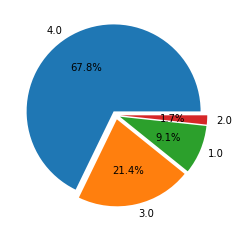

In [295]:
plt.pie(modalites["n"], labels=modalites["nova_group"], explode=[0.05]*len(modalites), normalize = True, autopct="%.1f%%")

La majorité des produits, 67.8%, présentent un Nova Group de 4.0. 

#### glycemic-index_100g

In [296]:
data['glycemic-index_100g'].describe()

count     4.000000
mean     34.175000
std      15.620153
min      14.000000
25%      26.000000
50%      37.000000
75%      45.175000
max      48.700000
Name: glycemic-index_100g, dtype: float64

Seulement 4 individus présentent un index glycémique, l'analyse de la distribution est donc peut représentative.

Text(0.5, 1.0, 'glycemic-index_100g')

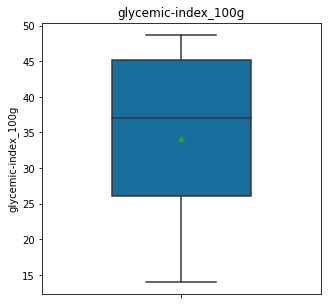

In [297]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='glycemic-index_100g', data=data, width=0.5, palette="colorblind", showfliers=True, showmeans=True)
plot.set_title("glycemic-index_100g")

#### classe_ig

In [298]:
moda(data,'classe_ig')

,classe_ig,n,f
0,IG Faible,4,100.0


### A.3 - Variables Nutriments <a name="A.3"></a>
#### fiber_100g

In [299]:
data['fiber_100g'].describe()

count    136751.000000
mean          3.038853
std           5.037592
min           0.000000
25%           0.200000
50%           1.700000
75%           3.700000
max         100.000000
Name: fiber_100g, dtype: float64

Text(0.5, 1.0, 'fiber_100g')

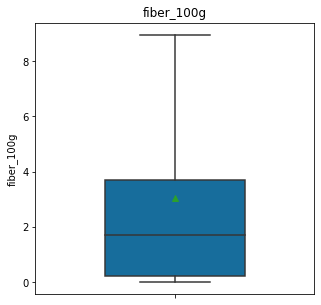

In [300]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='fiber_100g', data=data, width=0.5, palette="colorblind", showfliers=False,showmeans=True)
plot.set_title("fiber_100g")

In [301]:
#détermination du nombre de classes de l'histogramme à l'aide de la formule de Yule
nbins=nbinsYule(data['fiber_100g'])
nbins

69

<AxesSubplot:xlabel='fiber_100g', ylabel='Count'>

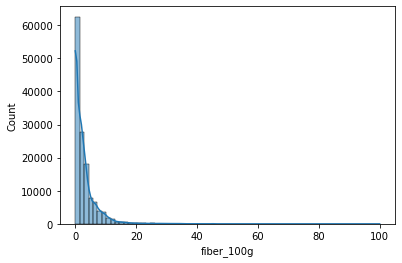

In [302]:
sns.histplot(data=data['fiber_100g'],bins=nbins, kde=True)

On est en présence d'une distribution unimodale avec un pic légérement au dessus de 0. Plus le taux de fibres aigmentent, moins il y a de produits.

#### fat_100g

In [303]:
data['fat_100g'].describe()

count    596461.000000
mean         14.383584
std          17.497327
min           0.000000
25%           1.200000
50%           8.200000
75%          22.800000
max         100.000000
Name: fat_100g, dtype: float64

Text(0.5, 1.0, 'fat_100g')

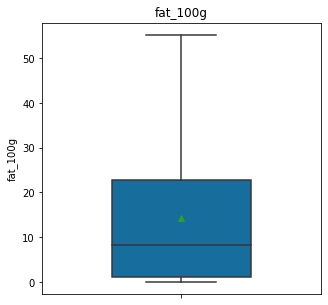

In [304]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='fat_100g', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title("fat_100g")

In [305]:
#détermination du nombre de classes de l'histogramme à l'aide de la formule de Yule
nbins=nbinsYule(data['fat_100g'])
nbins

69

<AxesSubplot:xlabel='fat_100g', ylabel='Count'>

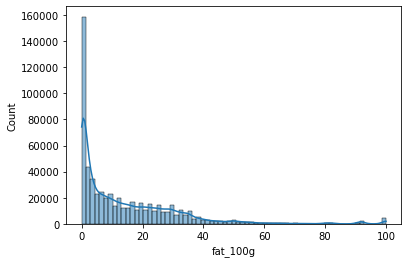

In [306]:
sns.histplot(data=data['fat_100g'],bins=nbins, kde=True)

On est en présence d'une distribution unimodale avec un pic aux alentours de 0. Le nombre de produits baisse plus la proportion de lipides augmente. On observes un "plateau" aux alentours de 10g et 30g pour 100g. Puis le nombre de produit chute aux alentours de 40g/100g. Malgrès tout on remarques quelques "petits" pics au delà de 80g/100g.

#### saturated-fat_100g

In [307]:
data['saturated-fat_100g'].describe()

count    596901.000000
mean          5.526152
std           7.997819
min           0.000000
25%           0.300000
50%           2.100000
75%           8.100000
max         100.000000
Name: saturated-fat_100g, dtype: float64

Text(0.5, 1.0, 'saturated-fat_100g')

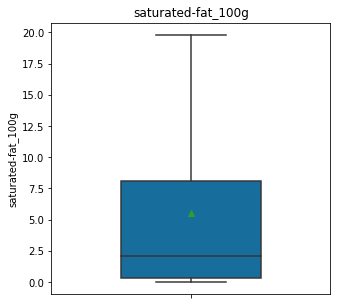

In [308]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='saturated-fat_100g', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title("saturated-fat_100g")

In [309]:
#détermination du nombre de classes de l'histogramme à l'aide de la formule de Yule
nbins=nbinsYule(data['saturated-fat_100g'])
nbins

69

<AxesSubplot:xlabel='saturated-fat_100g', ylabel='Count'>

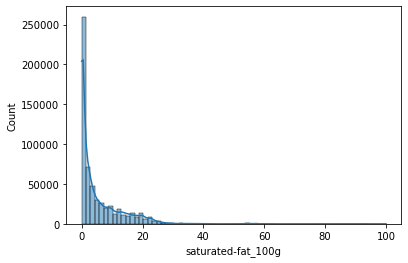

In [310]:
sns.histplot(data=data['saturated-fat_100g'],bins=nbins, kde=True)

On remarque une distribution unimodale avec un pic aux alentours de 0 et qui diminue plus le taux de saturated_fat augmente. Au delà de 20g/100g il n'y a quasiment plus aucun produit.

#### carbohydrates_100g

In [311]:
data['carbohydrates_100g'].describe()

count    596725.000000
mean         27.599401
std          27.748303
min           0.000000
25%           3.000000
50%          14.500000
75%          52.900000
max         100.000000
Name: carbohydrates_100g, dtype: float64

Text(0.5, 1.0, 'carbohydrates_100g')

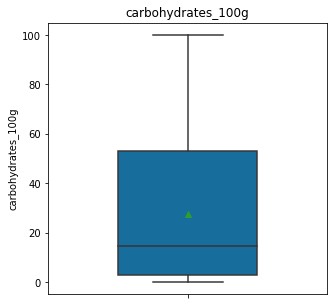

In [312]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='carbohydrates_100g', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title("carbohydrates_100g")

In [313]:
#détermination du nombre de classes de l'histogramme à l'aide de la formule de Yule
nbins=nbinsYule(data['carbohydrates_100g'])
nbins

69

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='Count'>

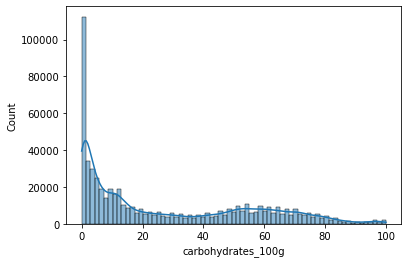

In [314]:
sns.histplot(data=data['carbohydrates_100g'],bins=nbins, kde=True)

On observe un pic dans la distribution aux alentours de 0 puis le nombre de produit baisse plus la quantité de glucides augmente. Par contre on remarque un "vague" entre 40g et 80g.

#### sugars_100g

In [315]:
data['sugars_100g'].describe()

count    597377.000000
mean         14.009598
std          20.139802
min          -0.100000
25%           0.700000
50%           3.700000
75%          20.000000
max         100.000000
Name: sugars_100g, dtype: float64

Text(0.5, 1.0, 'sugars_100g')

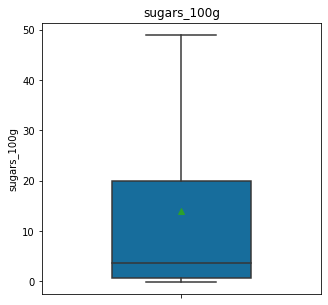

In [316]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='sugars_100g', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title("sugars_100g")

In [317]:
#détermination du nombre de classes de l'histogramme à l'aide de la formule de Yule
nbins=nbinsYule(data['sugars_100g'])
nbins

69

<AxesSubplot:xlabel='sugars_100g', ylabel='Count'>

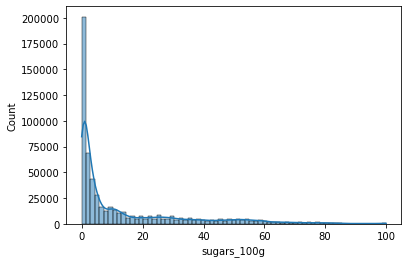

In [318]:
sns.histplot(data=data['sugars_100g'],bins=nbins, kde=True)

On observes que 50% des produits présentent un taux de sucres de maximum 3,7g/100g. Plus le taux de sucres augmente moins il y a de produits. Par contre on observe que le nombre de produits varie peu entre 20g et 60g.

#### proteins_100g

In [319]:
data['proteins_100g'].describe()

count    598646.000000
mean          8.980795
std           9.888819
min           0.000000
25%           1.700000
50%           6.300000
75%          13.000000
max         100.000000
Name: proteins_100g, dtype: float64

Text(0.5, 1.0, 'proteins_100g')

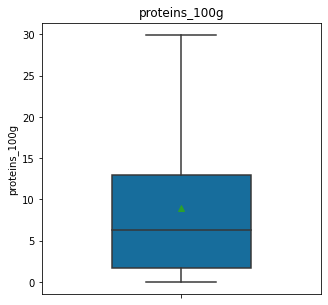

In [320]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='proteins_100g', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title("proteins_100g")

In [321]:
#détermination du nombre de classes de l'histogramme à l'aide de la formule de Yule
nbins=nbinsYule(data['proteins_100g'])
nbins

69

<AxesSubplot:xlabel='proteins_100g', ylabel='Count'>

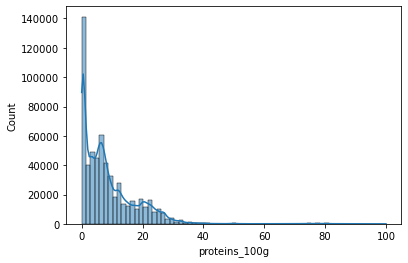

In [322]:
sns.histplot(data=data['proteins_100g'],bins=nbins, kde=True)

On remarque que le pic principal de la distribution est proche de 0. Ensuite on observe une chute du nombre de produits, puis remonte sur un 2ème pic aux alentours de 10g pour redescendre et remonter légèrement vers 20g. On ne trouves quasiment plus aucun produit au delà de 30g pour 100g.

#### salt_100g

In [323]:
data['salt_100g'].describe()

count    577274.000000
mean          1.165764
std           3.261812
min           0.000000
25%           0.080000
50%           0.570000
75%           1.300000
max         100.000000
Name: salt_100g, dtype: float64

Text(0.5, 1.0, 'salt_100g')

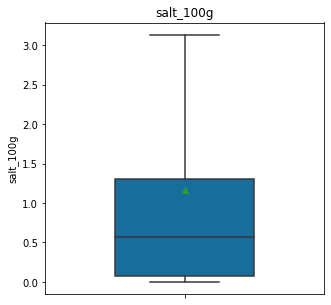

In [324]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='salt_100g', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title("salt_100g")

In [325]:
#détermination du nombre de classes de l'histogramme à l'aide de la formule de Yule
nbins=nbinsYule(data['salt_100g'])
nbins

69

<AxesSubplot:xlabel='salt_100g', ylabel='Count'>

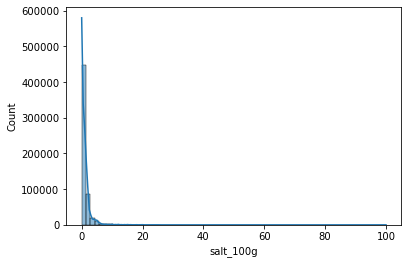

In [326]:
sns.histplot(data=data['salt_100g'],bins=nbins, kde=True)

On observe que 75% des produits on un taux de sel de maximum 1.3g/100g. 

### A.4 - Variables Energies <a name="A.4"></a>
#### energy-kcal_100g

In [327]:
data['energy-kcal_100g'].describe()

count    599428.000000
mean        281.524630
std         186.927887
min           0.010000
25%         120.000000
50%         271.000000
75%         403.000000
max        1000.000000
Name: energy-kcal_100g, dtype: float64

Text(0.5, 1.0, 'energy-kcal_100g')

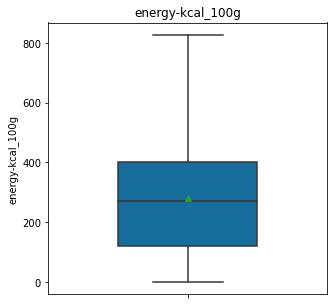

In [328]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='energy-kcal_100g', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title("energy-kcal_100g")

In [329]:
#détermination du nombre de classes de l'histogramme à l'aide de la formule de Yule
nbins=nbinsYule(data['energy-kcal_100g'])
nbins

69

<AxesSubplot:xlabel='energy-kcal_100g', ylabel='Count'>

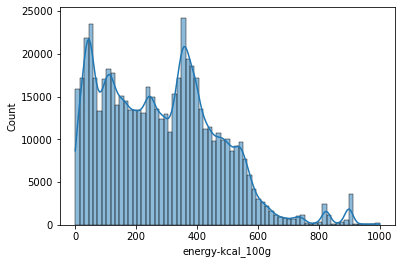

In [330]:
sns.histplot(data=data['energy-kcal_100g'],bins=nbins, kde=True)

Un produit dégage, en moyenne, 282 kcal. 25% des individus dégagent plus de 403kcal.On observe que le nombre de produit chute un peu avant 600kcal. Par contre, on remarque des pics légèrement au dessus de 800kcal et aux alentours de 900kcal.

### A.5 - Variables Score Nutritionnel <a name="A.5"></a>
#### nutriscore_score

In [331]:
data['nutriscore_score'].describe()

count    272252.000000
mean          9.623617
std           8.769857
min         -15.000000
25%           2.000000
50%          11.000000
75%          16.000000
max          40.000000
Name: nutriscore_score, dtype: float64

Text(0.5, 1.0, 'nutriscore_score')

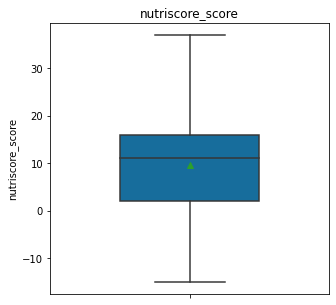

In [332]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='nutriscore_score', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title("nutriscore_score")

In [333]:
#détermination du nombre de classes de l'histogramme à l'aide de la formule de Yule
nbins=nbinsYule(data['nutriscore_score'])
nbins

69

<AxesSubplot:xlabel='nutriscore_score', ylabel='Count'>

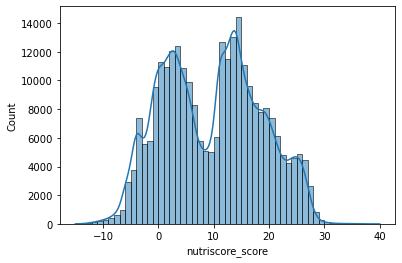

In [334]:
sns.histplot(data=data['nutriscore_score'],bins=55, kde=True)

On remarque une distribution plutôt symétrique. L’axe de symétrie se situe un peu avant 10, proche de la moyenne qui est de 9.62. On observe 2 pics dans la distribution, Un peut au dessus de 0 et entre 10 et 20.

#### nutriscore_grade

In [335]:
modalites=moda(data,'nutriscore_grade')
modalites

,nutriscore_grade,n,f
0,d,85786,31.509778
1,c,60018,22.045017
2,e,56010,20.572852
3,a,36788,13.512481
4,b,33650,12.359872


In [336]:
nbNaCol(data,'nutriscore_grade')

(327176, 54.58136757041713)

On remarque que 54,58% des individus ne présentent pas de note de nutriscore. On va donc regarder la répartition de la note de nutriscore parmis les individus ayant une note de nutriscore :

([<matplotlib.patches.Wedge at 0x263db115ee0>,
 [Text(0.6310809542868198, 0.9613723675748317, 'd'),
  Text(-1.025714523941194, 0.5200093416238692, 'c'),
  Text(-0.7418409081332199, -0.8787332172053586, 'e'),
  Text(0.41553135276248276, -1.0723029865067901, 'a'),
  Text(1.0643885642436586, -0.4354043916950347, 'b')],
 [Text(0.3566979306838546, 0.5433843816727308, '31.5%'),
  Text(-0.5797516874450226, 0.2939183235265348, '22.0%'),
  Text(-0.41930138285790686, -0.4966752966812895, '20.6%'),
  Text(0.23486554721357716, -0.6060842967212292, '13.5%'),
  Text(0.6016109276159809, -0.24609813443632392, '12.4%')])

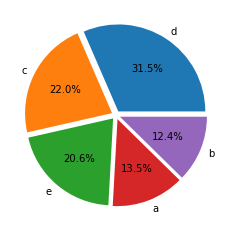

In [337]:
plt.pie(modalites["n"], labels=modalites["nutriscore_grade"], explode=[0.05]*len(modalites), normalize = True, autopct="%.1f%%")

La classe la plus représentée est la classe ‘d’ avec plus de 31,5% des individus. Les classes ‘a’ et ‘b’ réunies  ne représentent que 25,9%  des produits.

## B - Analyse Bivariée <a name="B"></a>
### B.1 - Quantitatives x Quantitatives <a name="B.1"></a>

In [338]:
#Création d'un dataframe contenant uniquement les colonnes des variables quantitatives du fichier de travail
dataQuanti=pd.DataFrame(data,columns=['fiber_100g','fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g','proteins_100g', 'salt_100g','energy-kcal_100g'])
dataQuanti

,fiber_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,energy-kcal_100g
0,1.5,15.0,4.0,70.0,0.0,7.8,0.4600,426.00
1,NaN,0.0,0.0,0.0,0.0,8.0,5.0000,1.00
2,3.0,15.0,8.8,72.0,22.0,8.2,0.9000,457.00
3,5.8,15.3,8.3,62.7,23.7,8.0,0.2300,434.00
4,NaN,27.8,3.8,53.0,46.3,9.4,0.2000,513.00
...,...,...,...,...,...,...,...,...
599423,NaN,0.1,NaN,12.2,NaN,2.4,NaN,58.99
599424,NaN,19.0,7.8,1.0,1.0,27.0,5.5118,281.60
599425,NaN,16.0,NaN,6.0,NaN,7.0,NaN,194.18
599426,NaN,17.9,NaN,6.4,NaN,7.0,NaN,212.57


On va maintenant croiser ces variables 2 à 2 afin de visualiser les relations qu'elles ont entre-elle :

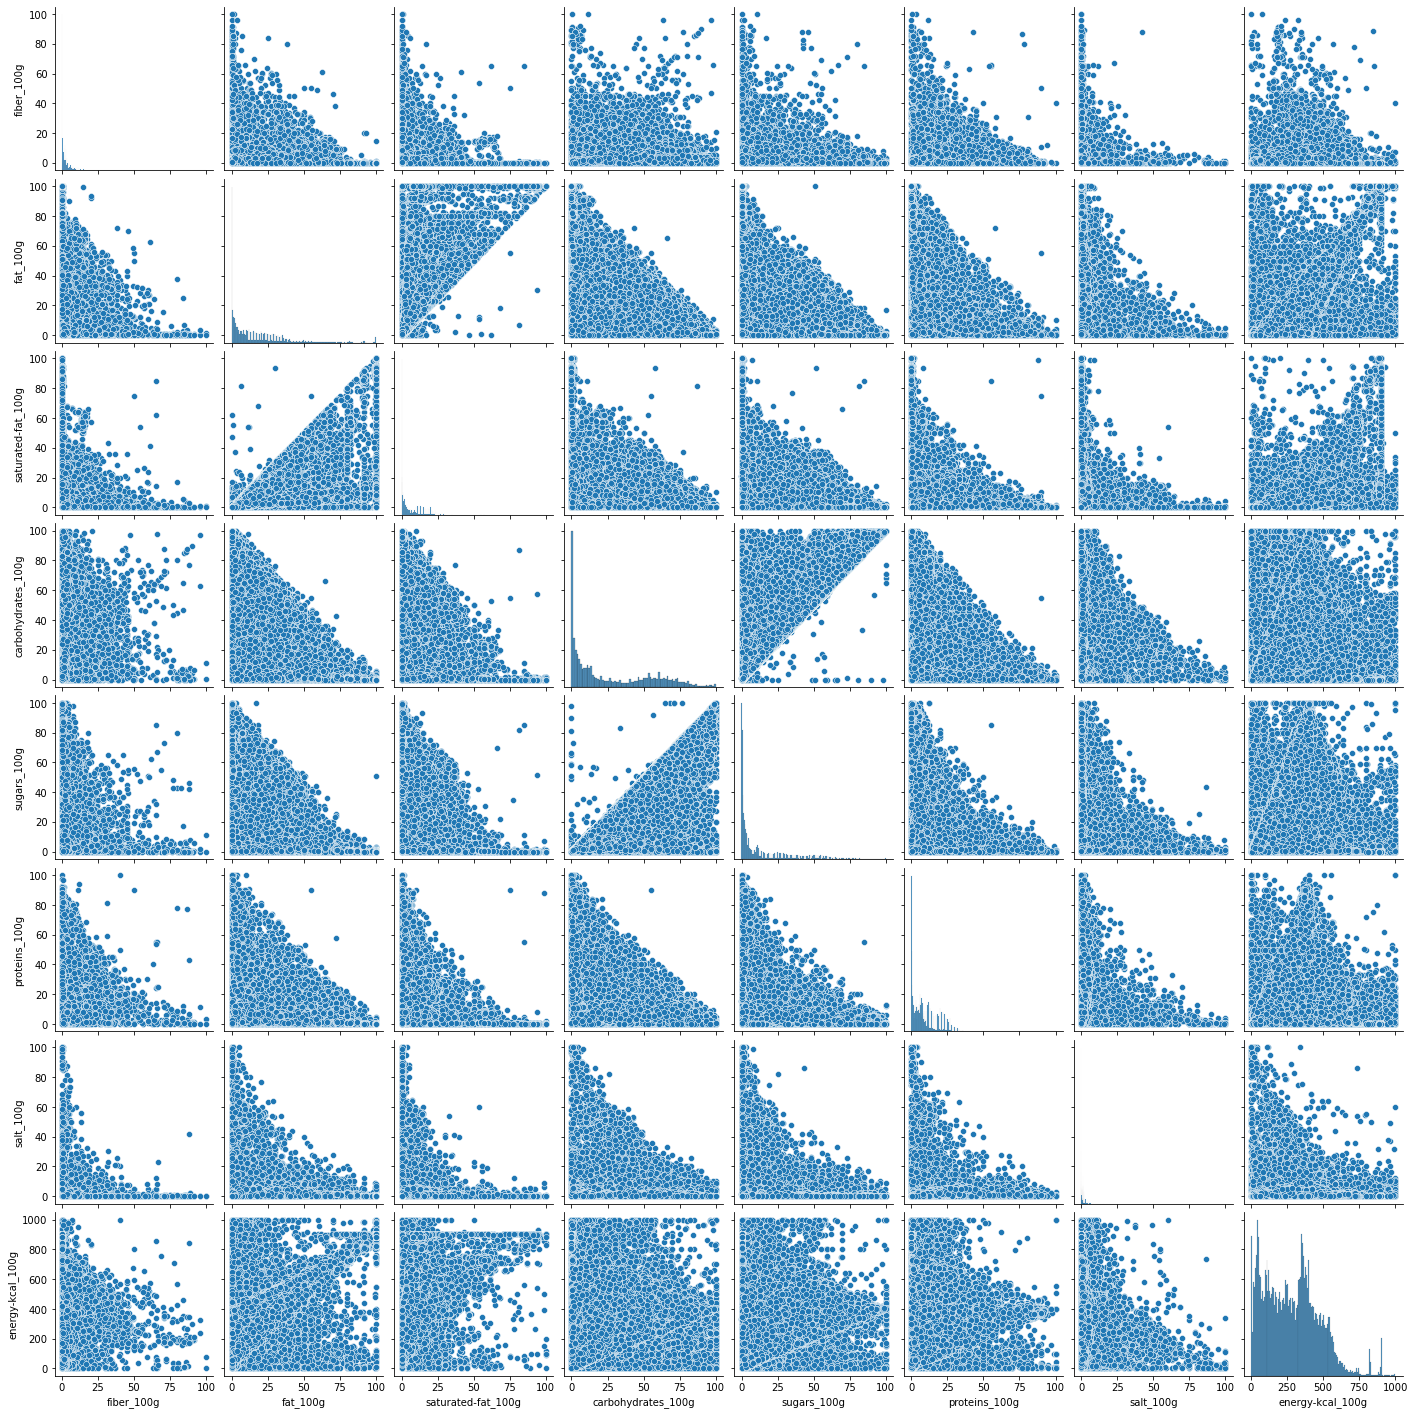

In [339]:
sns.pairplot(dataQuanti)

Comme nous avons beaucoup d'individus il est difficile d'intérpréter directement ces scatter plot. En effet, il peux y avoir beaucoup de "bruit" qui empêche une bonne lecture. Pour nous aider dans la lecture, nous allons calculer une matrice de corrélation :

In [340]:
matrixCorr=dataQuanti.corr()
matrixCorr

,fiber_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,energy-kcal_100g
fiber_100g,1.000000,0.061484,-0.002386,0.179092,0.006232,0.190000,-0.016243,0.220780
fat_100g,0.061484,1.000000,0.710954,-0.136776,-0.072241,0.119310,0.007913,0.755497
saturated-fat_100g,-0.002386,0.710954,1.000000,-0.066627,0.031372,0.127492,-0.001492,0.563734
carbohydrates_100g,0.179092,-0.136776,-0.066627,1.000000,0.702530,-0.234911,-0.107615,0.406120
sugars_100g,0.006232,-0.072241,0.031372,0.702530,1.000000,-0.288207,-0.124892,0.283257
proteins_100g,0.190000,0.119310,0.127492,-0.234911,-0.288207,1.000000,0.109489,0.167781
salt_100g,-0.016243,0.007913,-0.001492,-0.107615,-0.124892,0.109489,1.000000,-0.032364
energy-kcal_100g,0.220780,0.755497,0.563734,0.406120,0.283257,0.167781,-0.032364,1.000000


Pour nous aider à la lecture on va réaliser une 'heatmap' avec matrice des corrélation :

<AxesSubplot:>

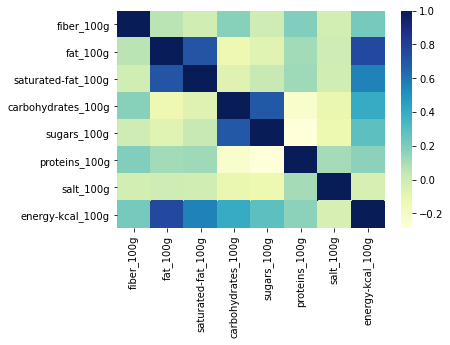

In [341]:
sns.heatmap(matrixCorr, cmap="YlGnBu")

On observe 3 paires de variables qui se démarquent avec un coefficient de corrélation supérieur à 0,7 :
- fat_100g x energy-kcal_100g : 0.755497
- fat_100g x saturated-fat_100g : 0.710954
- carbohydrates_100g x sugars_100g : 0.702530
- energy-kcal_100g x saturated-fat_100g : 0.563734

Ces résultats ne sont pas étonant car les lipides, fat_100g, sont les nutriments les plus énergétiques (9kcal/g) comparé aux glucides et protéines (4kcal/g) et aux fibres (2kcal/g)<br>
Aussi, les graisses saturées sont inclues dans les graisses, de même que les sucres sont inclus dans les glucides, il est donc logique que ces paires de variables soit très corrélées. 

### B.2 - Quantitatives x Qualitatives (y.c ANOVA) <a name="B.2"></a>
#### B.2.a - Introduction à l'ANOVA et préparation des données  <a name="B.2.a"></a>
Création d'une fonction permettant de réaliser rapidement des boxplot en parrallèles :

In [342]:
def bpQtQl(df,vQuant,vQual,rota=0):
    bp=sns.boxplot(y=vQuant, x=vQual, data=df, width=0.5, palette="colorblind",
               showfliers=False, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"5"})
    lab=bp.get_xticklabels()
    bp.set_xticklabels(labels=lab,rotation=rota)
    plt.show()

Renomage des variable, afin qu'elles puissent être prises en compte par les fonctions d'ANOVA :
- "energy-kcal_100g"-> "kcal"
- "saturated-fat_100g"-> "saturated_fat"

In [343]:
#conversion de la colonne en chaine de caractères
data["nova_group"]=data["nova_group"].astype(str)

In [344]:
#attribution d'un 'NaN' pour les modalités 'nan'
msk=data["nova_group"]=='nan'
data["nova_group"][msk]=np.nan

<ipython-input-344-e14f5d47954e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [345]:
#renommage
data=data.rename(columns={"energy-kcal_100g":"kcal"})
data=data.rename(columns={"saturated-fat_100g":"saturated_fat"})

Importation de Scipy pour la réalisation de l'ANOVA :

In [346]:
import scipy.stats as stats

Pour réaliser une ANOVA il faut d'abord que l'on vérifie des hypothèses afin de déterminer la méthode à mettre en place :
- Les populations étudiées doivent être indépendantes
- Les populations étudiées doivent suivre une Loi Normale
- Les variances des populations étudiées doivent être égales

1. Les populations étudiées sont-elle indépendantes ?
Ici on s'intéresse aux variables Qualitatives : pnns_groups_1, nova_group et nutriscore_grade <br>
Pour chaque variable qualitative les populations sont effectivement indépendantes. En effet chaque produit présente un unique pnns_groups_1, un unique nova_group et un unique nutriscore_grade.<br>
2. Les populations étudiées suivent-elle une Loi Normale ?
Ici on s'intéresse aux variables Quantitatives qui nous voulons particulièrement suivre: energy, fiber_100g, saturated-fat, sugars_100g et salt_100g. <br>
Lors de l'analyse univariée on a pas vu de distribution se rapprochant d'une distribution normale. On va donc vérifier cette hypothèse en réalisant des tests de normalité. <br>
Il existe plusieurs tests de normalité, un des plus connu est le test de Shapiro-Wilk. Par contre, pour ce test [la p-value peut ne pas être exacte pour un nombre d'individus > 5 000](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html). <br>
On va donc utiliser un test d'Agostino (normaltest) : Ce test part de l'hypothèse nulle que l'échantillon provient d'une distribution Normale. <br>
Avant on va valoriser les données manquantes pour pouvoir utiliser les fonctions de l'ANOVA :

In [347]:
#Valorisation des NaN des variables qualitatives
#valorisation des NaN de pnns_groups_1
data['pnns_groups_1']=data['pnns_groups_1'].fillna('Unknown')
#valorisation des 'NaN' du nova_group par "0.0"
data['nova_group']=data['nova_group'].fillna('0.0')
#valorisation des 'NaN' de nutriscore_grade par 'NA'
data['nutriscore_grade']=data['nutriscore_grade'].fillna('NA')

In [348]:
#Valorisation des NaN des variables quantitatives
#création d'une fonction qui valorise les 'NaN' d'une colonne par la moyenne de cette colonne
def fillNaMean(df,vquanti,dec=2):
    mean=np.around(df[vquanti].mean(),decimals=dec)
    df[vquanti]=df[vquanti].fillna(mean)

#valorisation des 'NaN' de fat_100g
fillNaMean(data,'fat_100g',dec=2)   
#valorisation des NaN : comme saturated_fat sont inclus dans fat_100g on valorises les NaN des individus contenant des fat 
#avec la moyenne des observations et le reste à 0 
msk=(data['fat_100g']>0)&(data['saturated_fat'].isna())
data["saturated_fat"][msk]=np.around(data['saturated_fat'].mean(),decimals=2)
data['saturated_fat']=data['saturated_fat'].fillna(0)

#valorisation des 'NaN' des glucides
fillNaMean(data,'carbohydrates_100g',dec=2)
#valorisation des NaN : comme sugars sont inclus dans carbohydrates_100g on valorises les NaN des individus contenant des 
#carbohydrates avec la moyenne des observations et le reste à 0
msk=(data['carbohydrates_100g']>0)&(data['sugars_100g'].isna())
data["sugars_100g"][msk]=np.around(data['sugars_100g'].mean(),decimals=2)
data["sugars_100g"]=data["sugars_100g"].fillna(0)

#valorisation des 'NaN' de 'salt_100g'
fillNaMean(data,'salt_100g',dec=2)

#on valorise les données manquantes de la colonne 'fiber_100g' par 0.0, en effet la plupart du temps les fibres sont indiquées 
#uniquement lorsque le produit en contient
data["fiber_100g"]=data["fiber_100g"].fillna(0.0)

<ipython-input-348-c5faca151f29>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-348-c5faca151f29>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Tests de Normalité : <br>
Hypothèse Nulle, H0 : l'échantillon provient d'une distribution Normale

In [349]:
stats.mstats.normaltest(data['kcal'])

NormaltestResult(statistic=28791.11579465828, pvalue=0.0)

In [350]:
stats.mstats.normaltest(data['fiber_100g'])

NormaltestResult(statistic=992553.9814421922, pvalue=0.0)

In [351]:
stats.mstats.normaltest(data['saturated_fat'])

NormaltestResult(statistic=429537.1551308122, pvalue=0.0)

In [352]:
stats.mstats.normaltest(data['sugars_100g'])

NormaltestResult(statistic=187347.69535608418, pvalue=0.0)

In [353]:
stats.mstats.normaltest(data['salt_100g'])

NormaltestResult(statistic=1148968.9167780522, pvalue=0.0)

Tout les tests présentent donc une pvalue < 0.05, on rejette donc l'hypothèse nulle que l'échantillon provient d'une distribution Normale. Donc aucune de ces variable ne provient d'une distribution Normale. On va donc contourner ce problème en réalisant une ANOVA non-paramètrique avec un test de Kruskall-Wallis que l'on combinera avec un test de Mann-Whitney pour voir les différences entre chaques paires de groupes de la variable Qualitative.
#### B.2.b - Energie :  <a name="B.2.b"></a>
##### Les niveaux d'énergie, kcal, sont ils différents entre chaques groupes d'aliments, PNNS-1 ?
Pour procéder à l'ANOVA on va valoriser les 'NaN' par 'Unknown' :

In [354]:
#definition d'une fonction qui renvoie les modalités d'une colonne d'un dataframe  
#ainsi que la moyenne d'une variable quantitative pour ces modalités
def modalMeans(df, vQuanti, vQuali):
    tabmoda = moda(df, vQuali)[vQuali]
    dfmeans=pd.DataFrame(tabmoda)
    nomcol='mean '+vQuanti
    dfmeans.insert(1,nomcol,0)
    for i in tabmoda:
        dfmeans[nomcol][dfmeans[vQuali]==i]=data[vQuanti][data[vQuali]==i].mean()
    return dfmeans.sort_values(by=[nomcol],ascending=False).reset_index(drop=True)

In [355]:
modalMeans(data,'kcal','pnns_groups_1')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,pnns_groups_1,mean kcal
0,Fat And Sauces,440.550485
1,Salty Snacks,419.842592
2,Sugary Snacks,408.369381
3,Cereals And Potatoes,332.980519
4,Unknown,280.660460
5,Milk And Dairy Products,233.689405
6,Fish Meat Eggs,215.332588
7,Composite Foods,179.187933
8,Fruits And Vegetables,133.580759
9,Beverages,72.330553


#### Visualisation:

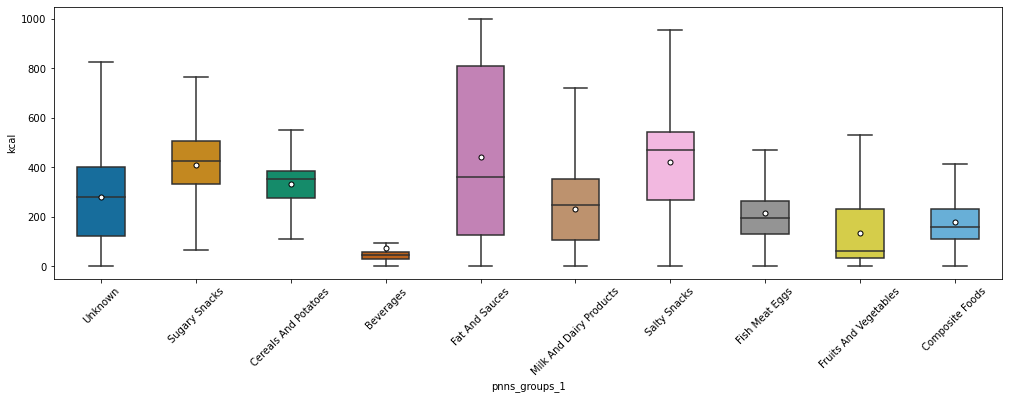

In [356]:
plt.figure(figsize=(17,5))
bpQtQl(data,'kcal','pnns_groups_1',rota=45)
plt.show()

#### Test ANOVA :<br>
Hypothèse Nulle H0 : Les niveaux d’énergies moyens ne sont pas significativement différents entre chaques groupes, pnns_1

In [357]:
stats.kruskal(data[data['pnns_groups_1']=='Sugary Snacks']['kcal'],
               data[data['pnns_groups_1']=='Fish Meat Eggs']['kcal'],
               data[data['pnns_groups_1']=='Unknown']['kcal'],
               data[data['pnns_groups_1']=='Milk And Dairy Products']['kcal'],
               data[data['pnns_groups_1']=='Cereals And Potatoes']['kcal'],
               data[data['pnns_groups_1']=='Composite Foods']['kcal'],
               data[data['pnns_groups_1']=='Beverages']['kcal'],
               data[data['pnns_groups_1']=='Fat And Sauces']['kcal'],
               data[data['pnns_groups_1']=='Fruits And Vegetables']['kcal'],
               data[data['pnns_groups_1']=='Salty Snacks']['kcal'])

KruskalResult(statistic=111649.10226463362, pvalue=0.0)

Avec une pvalue de 0, <0.05, on peut donc rejetter l'hypothèse nulle d'égalité des moyennes : Les niveaux d'énergie moyens sont donc significativment différents pour chaques groupes pnns_1.<br>
Pour affiner ce résultat on va réaliser un test de Mann-Whitney qui va tester l'égalité des moyenne de chaques paires de groupes pnns_1 pour voir si les niveaux d'énergie moyens sont significativement différent entre chaques groupes. <br>
Pour automatiser ces tests on va réaliser une fonctions qui va réaliser un test de Mann-Whitney pour chaques paires de modalités de la variable qualitative :

In [358]:
from itertools import combinations 

def mannwhitney_pairs(data,vquali, vquanti, aff='all'):
    grp = modalMeans(data, vquanti, vquali)[vquali]
    for i in combinations(grp,2):
        rejet = False
        stat, p = stats.mannwhitneyu(data[data[vquali]==i[0]][vquanti],
                       data[data[vquali]==i[1]][vquanti])
        if p < 0.05:
            rejet = True
        if aff=='all':
            print(i[0],'/',i[1],'\n stat :',stat,'p-value :', p, 'rejet :',rejet)
        elif aff=='reject' and rejet:
            print(i[0],'/',i[1],'\n stat :',stat,'p-value :', p, 'rejet :',rejet)
        elif aff=='keep' and rejet == False:
            print(i[0],'/',i[1],'\n stat :',stat,'p-value :', p, 'rejet :',rejet)

#### Test de Mann-Whitney :

In [359]:
mannwhitney_pairs(data,'pnns_groups_1', 'kcal')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Fat And Sauces / Salty Snacks 
 stat : 185860665.5 p-value : 0.014921926484979206 rejet : True
Fat And Sauces / Sugary Snacks 
 stat : 577692826.0 p-value : 3.0290732381700157e-05 rejet : True
Fat And Sauces / Cereals And Potatoes 
 stat : 254280839.5 p-value : 2.9543126489368526e-47 rejet : True
Fat And Sauces / Unknown 
 stat : 2645771708.0 p-value : 0.0 rejet : True
Fat And Sauces / Milk And Dairy Products 
 stat : 246989768.0 p-value : 0.0 rejet : True
Fat And Sauces / Fish Meat Eggs 
 stat : 299584149.0 p-value : 0.0 rejet : True
Fat And Sauces / Composite Foods 
 stat : 160624021.5 p-value : 0.0 rejet : True
Fat And Sauces / Fruits And Vegetables 
 stat : 76281654.5 p-value : 0.0 rejet : True
Fat And Sauces / Beverages 
 stat : 45448923.0 p-value : 0.0 rejet : True
Salty Snacks / Sugary Snacks 
 stat : 483650508.5 p-value : 1.2844012438609476e-59 rejet : True
Salty Snacks / Cereals And Potatoes 
 stat : 161573050.5 p-value : 0.0 rejet : True
Salty Snacks / Unknown 
 stat : 173356

On peut voir que toutes les p-values sont <0.05, on peut donc affirmer que les niveaux d'énergie moyens sont donc significativement différents entre chaques groupes pnns_1.

##### Les niveaux d'énergie, kcal, sont ils différents suivant le degré de transformation, NOVA ?

In [360]:
modalMeans(data,'kcal','nova_group')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,nova_group,mean kcal
0,2.0,617.773685
1,0.0,284.768270
2,4.0,279.092781
3,3.0,261.424702
4,1.0,204.002349


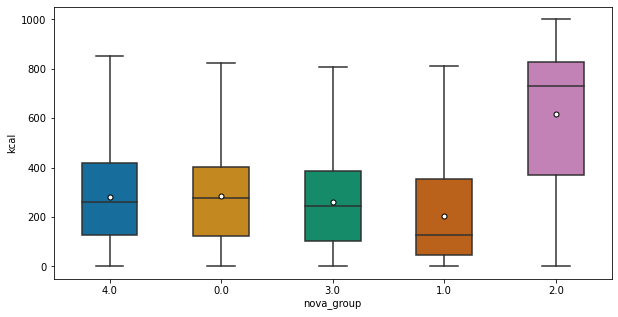

In [361]:
plt.figure(figsize=(10,5))
bpQtQl(data,'kcal','nova_group')
plt.show()

#### Test ANOVA :<br>
Hypothèse Nulle H0 : Les niveaux d’énergies moyens ne sont pas significativement différents suivant le degré de transformation NOVA.

In [362]:
stats.kruskal(data[data['nova_group']=='0.0']['kcal'],
               data[data['nova_group']=='1.0']['kcal'],
               data[data['nova_group']=='2.0']['kcal'],
               data[data['nova_group']=='3.0']['kcal'],
               data[data['nova_group']=='4.0']['kcal'])

KruskalResult(statistic=7995.0567593231035, pvalue=0.0)

Avec une pvalue de 0, <0.05, on peut donc rejetter l'hypothèse nulle d'égalité des moyennes : Les niveaux d'énergie moyens sont donc significativment différents suivant le degré de transformation NOVA.<br>
Pour affiner ce résultat on va réaliser un test de Mann-Whitney qui va tester l'égalité des moyenne de chaques paires de groupes NOVA pour voir si les niveaux d'énergie moyens sont significativement différent entre chaques groupes. <br>

In [363]:
mannwhitney_pairs(data,'nova_group', 'kcal')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2.0 / 0.0 
 stat : 232941543.0 p-value : 0.0 rejet : True
2.0 / 4.0 
 stat : 66805779.0 p-value : 0.0 rejet : True
2.0 / 3.0 
 stat : 19336964.5 p-value : 0.0 rejet : True
2.0 / 1.0 
 stat : 6685024.5 p-value : 0.0 rejet : True
0.0 / 4.0 
 stat : 25864818706.0 p-value : 0.006223556903194306 rejet : True
0.0 / 3.0 
 stat : 7705582843.5 p-value : 7.64570853329128e-89 rejet : True
0.0 / 1.0 
 stat : 2542989857.0 p-value : 0.0 rejet : True
4.0 / 3.0 
 stat : 2312550346.5 p-value : 1.9294227950354374e-92 rejet : True
4.0 / 1.0 
 stat : 748134040.5 p-value : 0.0 rejet : True
3.0 / 1.0 
 stat : 256279111.0 p-value : 0.0 rejet : True


On peut voir que toutes les p-values sont <0.05, on peut donc affirmer que les niveaux d'énergie moyens sont donc significativement différents entre chaques nova_group.

##### Les niveaux d'énergie, kcal, sont ils différents suivant le Nutriscore ?

In [364]:
modalMeans(data,'kcal','nutriscore_grade')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,nutriscore_grade,mean kcal
0,e,408.831185
1,d,321.812665
2,NA,280.842788
3,c,246.107297
4,a,170.565658
5,b,158.021771


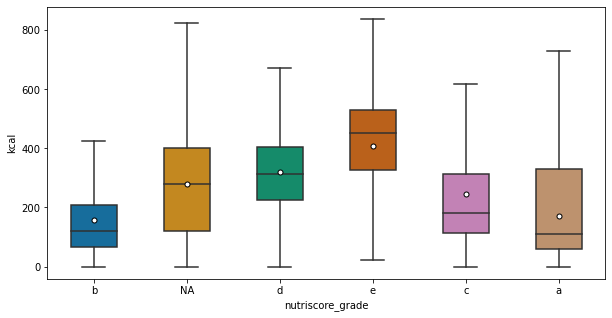

In [365]:
plt.figure(figsize=(10,5))
bpQtQl(data,'kcal','nutriscore_grade')
plt.show()

#### Test ANOVA :<br>
Hypothèse Nulle H0 : Les niveaux d’énergies moyens ne sont pas significativement différents suivant la note du Nutriscore

In [366]:
stats.kruskal(data[data['nutriscore_grade']=='a']['kcal'],
               data[data['nutriscore_grade']=='b']['kcal'],
               data[data['nutriscore_grade']=='c']['kcal'],
               data[data['nutriscore_grade']=='d']['kcal'],
               data[data['nutriscore_grade']=='e']['kcal'],
              data[data['nutriscore_grade']=='NA']['kcal'])

KruskalResult(statistic=67157.35859397796, pvalue=0.0)

Avec une pvalue de 0, <0.05, on peut donc rejetter l'hypothèse nulle d'égalité des moyennes : Les niveaux d'énergie moyens sont donc significativment différents suivant la note du Nutriscore.<br>
Pour affiner ce résultat on va réaliser un test de Mann-Whitney qui va tester l'égalité des moyenne de chaques paires de notes du Nutriscore pour voir si les niveaux d'énergie moyens sont significativement différent entre chaques notes. <br>

In [367]:
mannwhitney_pairs(data,'nutriscore_grade', 'kcal')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



e / d 
 stat : 1500787045.0 p-value : 0.0 rejet : True
e / NA 
 stat : 5420510800.5 p-value : 0.0 rejet : True
e / c 
 stat : 860480692.5 p-value : 0.0 rejet : True
e / a 
 stat : 354428459.0 p-value : 0.0 rejet : True
e / b 
 stat : 308155971.0 p-value : 0.0 rejet : True
d / NA 
 stat : 12089372859.0 p-value : 0.0 rejet : True
d / c 
 stat : 1613141170.0 p-value : 0.0 rejet : True
d / a 
 stat : 718375251.5 p-value : 0.0 rejet : True
d / b 
 stat : 540756108.5 p-value : 0.0 rejet : True
NA / c 
 stat : 8302701538.0 p-value : 0.0 rejet : True
NA / a 
 stat : 3884577176.5 p-value : 0.0 rejet : True
NA / b 
 stat : 3320734346.5 p-value : 0.0 rejet : True
c / a 
 stat : 825720602.0 p-value : 0.0 rejet : True
c / b 
 stat : 716976792.0 p-value : 0.0 rejet : True
a / b 
 stat : 612231950.5 p-value : 0.006294044689572369 rejet : True


On peut voir que toutes les p-values sont <0.05, on peut donc affirmer que les niveaux d'énergie moyens sont donc significativement différents entre chaque notes de nutriscore.

#### B.2.c - Nutriments : <a name="B.2.c"></a>
##### B.2.c.1 - Saturated-Fat (Graisses saturées) : <a name="B.2.c.1"></a>
Est-ce que certains groupes d'aliments, PNNS-1, présentent plus de graisses saturées que d'autres ?

In [368]:
modalMeans(data,'saturated_fat','pnns_groups_1')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,pnns_groups_1,mean saturated_fat
0,Milk And Dairy Products,10.957036
1,Fat And Sauces,10.683572
2,Sugary Snacks,8.656756
3,Salty Snacks,7.577403
4,Unknown,5.174519
5,Fish Meat Eggs,4.549870
6,Composite Foods,2.809433
7,Cereals And Potatoes,1.908760
8,Fruits And Vegetables,1.351864
9,Beverages,0.552880


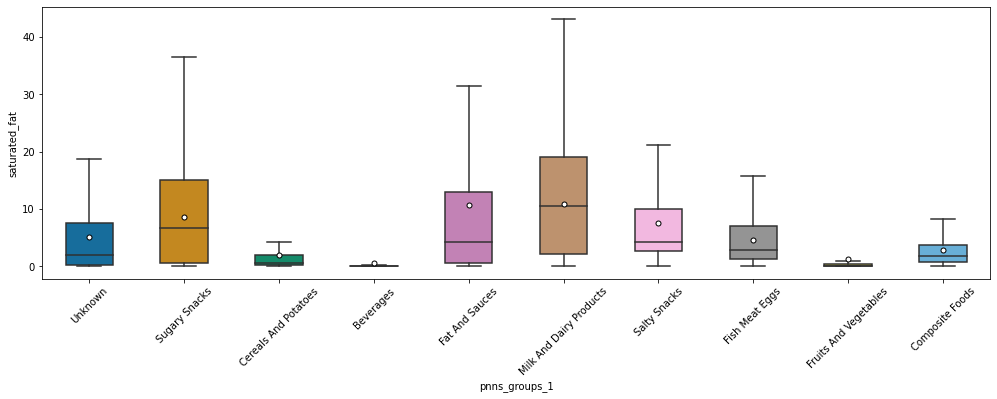

In [369]:
plt.figure(figsize=(17,5))
bpQtQl(data,'saturated_fat','pnns_groups_1', rota=45)
plt.show()

#### Test ANOVA :<br>
Hypothèse Nulle H0 : La quantité moyenne de graisses saturées n’est pas significativement différente entre chaques groupes pnns_1

In [370]:
stats.kruskal(data[data['pnns_groups_1']=='Sugary Snacks']['saturated_fat'],
               data[data['pnns_groups_1']=='Fish Meat Eggs']['saturated_fat'],
               data[data['pnns_groups_1']=='Unknown']['saturated_fat'],
               data[data['pnns_groups_1']=='Milk And Dairy Products']['saturated_fat'],
               data[data['pnns_groups_1']=='Cereals And Potatoes']['saturated_fat'],
               data[data['pnns_groups_1']=='Composite Foods']['saturated_fat'],
               data[data['pnns_groups_1']=='Beverages']['saturated_fat'],
               data[data['pnns_groups_1']=='Fat And Sauces']['saturated_fat'],
               data[data['pnns_groups_1']=='Fruits And Vegetables']['saturated_fat'],
               data[data['pnns_groups_1']=='Salty Snacks']['saturated_fat'])

KruskalResult(statistic=84976.47835575673, pvalue=0.0)

Avec une pvalue de 0, <0.05, on peut donc rejetter l'hypothèse nulle d'égalité des moyennes : La quantité moyenne de graisse saturées est donc significativment différente suivant le groupe pnns_1.<br>
Pour affiner ce résultat on va réaliser un test de Mann-Whitney qui va tester l'égalité des moyenne de chaques paires de groupe pnns_1 pour voir si la quantité moyenne de graisses saturées est significativement différente entre chaques groupes pnns_1. 

In [371]:
mannwhitney_pairs(data,'pnns_groups_1', 'saturated_fat', aff='keep')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Sugary Snacks / Salty Snacks 
 stat : 523534446.0 p-value : 0.2273084524027439 rejet : False


On peut rejetter l'hypothèse nulle pour toutes les paires sauf pour la paire "Sugary Snacks / Salty Snacks". La quantité moyenne de graisses saturées est donc significativement différentes entre chaques paires de groupes pnns_1, sauf entre "Sugary Snacks" et "Salty Snacks".

##### Il y a t'il plus de graisses saturées dans les aliments les plus transformés ?

In [372]:
modalMeans(data,'saturated_fat','nova_group')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,nova_group,mean saturated_fat
0,2.0,21.675664
1,3.0,6.392273
2,0.0,5.533693
3,4.0,5.354984
4,1.0,1.480082


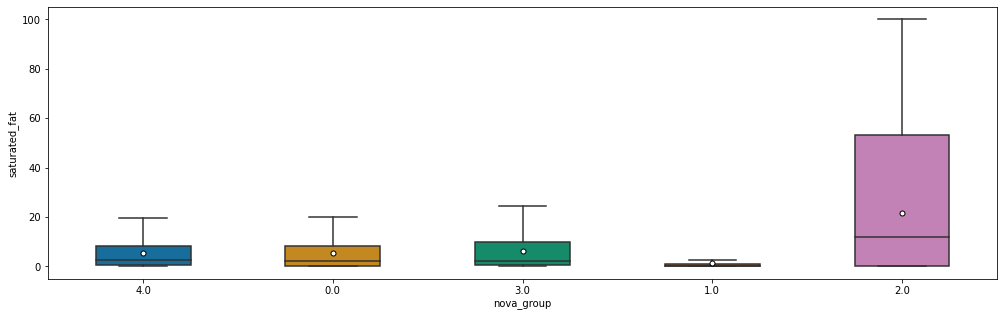

In [373]:
plt.figure(figsize=(17,5))
bpQtQl(data,'saturated_fat','nova_group')
plt.show()

#### Test ANOVA :<br>
Hypothèse Nulle H0 : La quantité moyenne de graisses saturées n’est pas significativement différente suivant le degré de transformation

In [374]:
stats.kruskal(data[data['nova_group']=='0.0']['saturated_fat'],
               data[data['nova_group']=='1.0']['saturated_fat'],
               data[data['nova_group']=='2.0']['saturated_fat'],
               data[data['nova_group']=='3.0']['saturated_fat'],
               data[data['nova_group']=='4.0']['saturated_fat'])

KruskalResult(statistic=11182.873939844188, pvalue=0.0)

Avec une pvalue de 0, <0.05, on peut donc rejetter l'hypothèse nulle d'égalité des moyennes : La quantité moyenne de graisse saturées est donc significativment différente suivant le degré de transformation.<br>
Pour affiner ce résultat on va réaliser un test de Mann-Whitney qui va tester l'égalité des moyenne de chaques paires de nova_group pour voir si la quantité moyenne de graisses saturées est significativement différente entre chaques groupe NOVA.

In [375]:
mannwhitney_pairs(data,'nova_group', 'saturated_fat', aff='all')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2.0 / 3.0 
 stat : 50324743.5 p-value : 5.598278611460769e-72 rejet : True
2.0 / 0.0 
 stat : 492692264.5 p-value : 3.558672770050702e-124 rejet : True
2.0 / 4.0 
 stat : 151036394.0 p-value : 5.465449926905165e-112 rejet : True
2.0 / 1.0 
 stat : 15383046.0 p-value : 4.7596062048296e-310 rejet : True
3.0 / 0.0 
 stat : 7695646659.0 p-value : 1.2470202144466153e-92 rejet : True
3.0 / 4.0 
 stat : 2442847165.0 p-value : 2.2756133787866856e-06 rejet : True
3.0 / 1.0 
 stat : 171496922.0 p-value : 0.0 rejet : True
0.0 / 4.0 
 stat : 24773525013.5 p-value : 2.2735441683800555e-139 rejet : True
0.0 / 1.0 
 stat : 2000042696.0 p-value : 0.0 rejet : True
4.0 / 1.0 
 stat : 525687425.5 p-value : 0.0 rejet : True


On peut rejetter l'hypothèse nulle pour toutes les paires de nova_group. La quantité moyenne de graisses saturées est donc significativement différentes entre chaques paires de groupes NOVA.

##### Une forte proportion de graisses saturées est elle liée à un nutriscore élevé ?

In [376]:
modalMeans(data,'saturated_fat','nutriscore_grade')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,nutriscore_grade,mean saturated_fat
0,e,13.422284
1,d,7.180417
2,NA,5.178609
3,c,3.037763
4,b,1.260220
5,a,0.666324


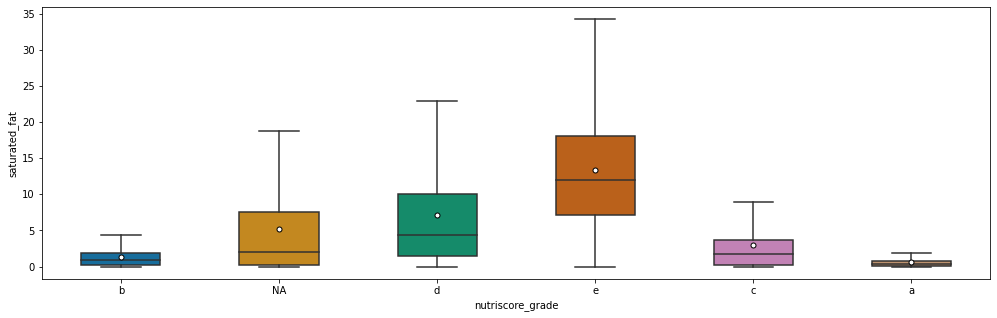

In [377]:
plt.figure(figsize=(17,5))
bpQtQl(data,'saturated_fat','nutriscore_grade')
plt.show()

#### Test ANOVA :<br>
Hypothèse Nulle H0 : La quantité moyenne de graisses saturées n’est pas significativement différente suivant la note du nutriscore

In [378]:
stats.kruskal(data[data['nutriscore_grade']=='a']['saturated_fat'],
               data[data['nutriscore_grade']=='b']['saturated_fat'],
               data[data['nutriscore_grade']=='c']['saturated_fat'],
               data[data['nutriscore_grade']=='d']['saturated_fat'],
               data[data['nutriscore_grade']=='e']['saturated_fat'],
              data[data['nutriscore_grade']=='NA']['saturated_fat'])

KruskalResult(statistic=81255.46835032478, pvalue=0.0)

Avec une pvalue de 0, <0.05, on peut donc rejetter l'hypothèse nulle d'égalité des moyennes : La quantité moyenne de graisse saturées est donc significativment différente suivant la note du nutriscore.<br>
Pour affiner ce résultat on va réaliser un test de Mann-Whitney qui va tester l'égalité des moyenne de chaques paires de notes du Nutriscore pour voir si la quantité moyenne de graisses saturées est significativement différente entre chaques notes de Nutriscore.

In [379]:
mannwhitney_pairs(data,'nutriscore_grade', 'saturated_fat', aff='all')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



e / d 
 stat : 1518526900.0 p-value : 0.0 rejet : True
e / NA 
 stat : 4650223502.0 p-value : 0.0 rejet : True
e / c 
 stat : 624575385.5 p-value : 0.0 rejet : True
e / b 
 stat : 269643474.0 p-value : 0.0 rejet : True
e / a 
 stat : 269548096.0 p-value : 0.0 rejet : True
d / NA 
 stat : 11048014670.5 p-value : 0.0 rejet : True
d / c 
 stat : 1650328108.0 p-value : 0.0 rejet : True
d / b 
 stat : 647710247.0 p-value : 0.0 rejet : True
d / a 
 stat : 545421030.0 p-value : 0.0 rejet : True
NA / c 
 stat : 8849286572.5 p-value : 0.0 rejet : True
NA / b 
 stat : 4021009645.5 p-value : 0.0 rejet : True
NA / a 
 stat : 3494992350.5 p-value : 0.0 rejet : True
c / b 
 stat : 778539386.5 p-value : 0.0 rejet : True
c / a 
 stat : 640333878.0 p-value : 0.0 rejet : True
b / a 
 stat : 441868859.5 p-value : 0.0 rejet : True


On peut rejetter l'hypothèse nulle pour toutes les paires de notes du nutriscore. La quantité moyenne de graisses saturées est donc significativement différentes entre chaques notes du nutriscore.

##### B.2.c.2 - Sugars (Sucres) : <a name="B.2.c.2"></a>
Est-ce que certains groupes d'aliments, PNNS-1, présentent plus de sucres que d'autres ?

In [380]:
modalMeans(data,'sugars_100g','pnns_groups_1')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,pnns_groups_1,mean sugars_100g
0,Sugary Snacks,38.385493
1,Fruits And Vegetables,15.697507
2,Unknown,14.646538
3,Beverages,13.752271
4,Milk And Dairy Products,6.862925
5,Fat And Sauces,5.850953
6,Cereals And Potatoes,5.790995
7,Composite Foods,3.088199
8,Salty Snacks,3.060670
9,Fish Meat Eggs,0.877103


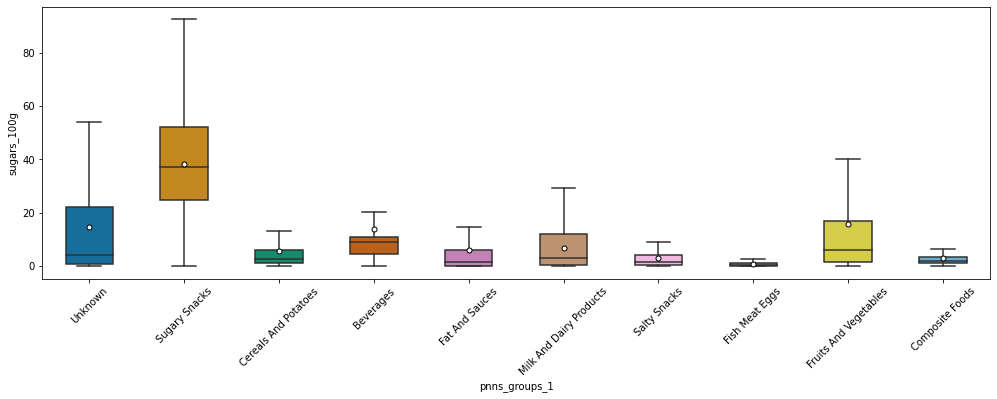

In [381]:
plt.figure(figsize=(17,5))
bpQtQl(data,'sugars_100g','pnns_groups_1',rota=45)
plt.show()

#### Test ANOVA :<br>
Hypothèse Nulle H0 : La quantité moyenne de sucres n’est pas significativement différente entre les groupes pnns_1.

In [382]:
stats.kruskal(data[data['pnns_groups_1']=='Sugary Snacks']['sugars_100g'],
               data[data['pnns_groups_1']=='Fish Meat Eggs']['sugars_100g'],
               data[data['pnns_groups_1']=='Unknown']['sugars_100g'],
               data[data['pnns_groups_1']=='Milk And Dairy Products']['sugars_100g'],
               data[data['pnns_groups_1']=='Cereals And Potatoes']['sugars_100g'],
               data[data['pnns_groups_1']=='Composite Foods']['sugars_100g'],
               data[data['pnns_groups_1']=='Beverages']['sugars_100g'],
               data[data['pnns_groups_1']=='Fat And Sauces']['sugars_100g'],
               data[data['pnns_groups_1']=='Fruits And Vegetables']['sugars_100g'],
               data[data['pnns_groups_1']=='Salty Snacks']['sugars_100g'])

KruskalResult(statistic=133532.78106657977, pvalue=0.0)

Avec une pvalue de 0, <0.05, on peut donc rejetter l'hypothèse nulle d'égalité des moyennes : La quantité moyenne de sucres est donc significativment différente suivant le groupe pnns_1.<br>
Pour affiner ce résultat on va réaliser un test de Mann-Whitney qui va tester l'égalité des moyenne de chaques paires de groupe pnns_1 pour voir si la quantité moyenne de sucres est significativement différente entre chaques groupe pnns_1.

In [383]:
mannwhitney_pairs(data,'pnns_groups_1', 'sugars_100g', aff='keep')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Fat And Sauces / Salty Snacks 
 stat : 187298442.0 p-value : 0.19125388114176878 rejet : False


On peut rejetter l'hypothèse nulle pour toutes les paires sauf pour la paire "Fat And Sauces / Salty Snacks". La quantité moyenne de sucres est donc significativement différentes entre chaques paires de groupes pnns_1, sauf entre "Fat And Sauces" et "Salty Snacks".

Il y a t'il plus de sucres dans les aliments les plus transformés ?

In [384]:
modalMeans(data,'sugars_100g','nova_group')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,nova_group,mean sugars_100g
0,2.0,24.507120
1,4.0,17.888365
2,0.0,13.604139
3,3.0,8.073996
4,1.0,6.858046


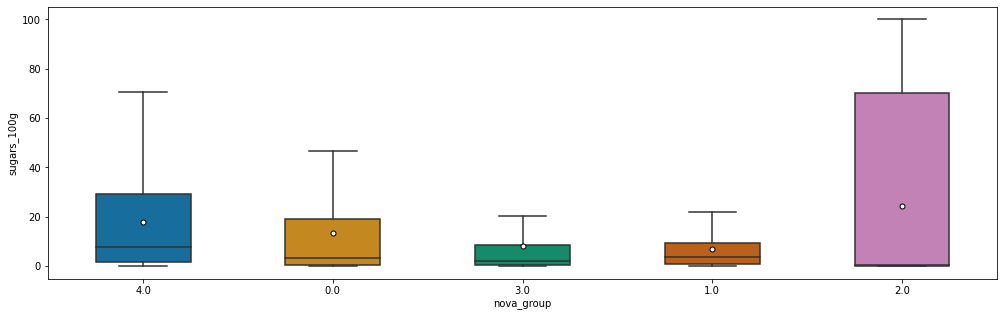

In [385]:
plt.figure(figsize=(17,5))
bpQtQl(data,'sugars_100g','nova_group')
plt.show()

#### Test ANOVA :<br>
Hypothèse Nulle H0 : La quantité moyenne de sucres n’est pas significativement différente suivant le degré de transformation.

In [386]:
stats.kruskal(data[data['nova_group']=='0.0']['sugars_100g'],
               data[data['nova_group']=='1.0']['sugars_100g'],
               data[data['nova_group']=='2.0']['sugars_100g'],
               data[data['nova_group']=='3.0']['sugars_100g'],
               data[data['nova_group']=='4.0']['sugars_100g'])

KruskalResult(statistic=14824.032062130076, pvalue=0.0)

Avec une pvalue de 0, <0.05, on peut donc rejetter l'hypothèse nulle d'égalité des moyennes : La quantité moyenne de sucres est donc significativment différente suivant le degré de transformation.<br>
Pour affiner ce résultat on va réaliser un test de Mann-Whitney qui va tester l'égalité des moyenne de chaques paires de groupe Nova pour voir si la quantité moyenne de sucres est significativement différente entre chaques nova_groups.

In [387]:
mannwhitney_pairs(data,'nova_group', 'sugars_100g', aff='all')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2.0 / 4.0 
 stat : 139882151.0 p-value : 3.175013743951436e-171 rejet : True
2.0 / 0.0 
 stat : 537235691.0 p-value : 2.20443518031926e-65 rejet : True
2.0 / 3.0 
 stat : 54105026.0 p-value : 1.080527653503437e-34 rejet : True
2.0 / 1.0 
 stat : 21227036.0 p-value : 5.931497467295628e-69 rejet : True
4.0 / 0.0 
 stat : 21124936395.5 p-value : 0.0 rejet : True
4.0 / 3.0 
 stat : 1629051192.0 p-value : 0.0 rejet : True
4.0 / 1.0 
 stat : 766733172.0 p-value : 0.0 rejet : True
0.0 / 3.0 
 stat : 7086226386.5 p-value : 0.0 rejet : True
0.0 / 1.0 
 stat : 3315337378.5 p-value : 6.111385453735076e-26 rejet : True
3.0 / 1.0 
 stat : 292576477.0 p-value : 2.2241344108107823e-112 rejet : True


On peut rejetter l'hypothèse nulle pour toutes les paires. La quantité moyenne de sucres est donc significativement différentes entre chaques paires de nova_group.

##### Une forte proportion de sucres est elle liée à un nutriscore élevé ?

In [388]:
modalMeans(data,'sugars_100g','nutriscore_grade')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,nutriscore_grade,mean sugars_100g
0,e,22.062280
1,NA,15.105856
2,d,14.973448
3,c,10.695068
4,b,4.576430
5,a,3.685339


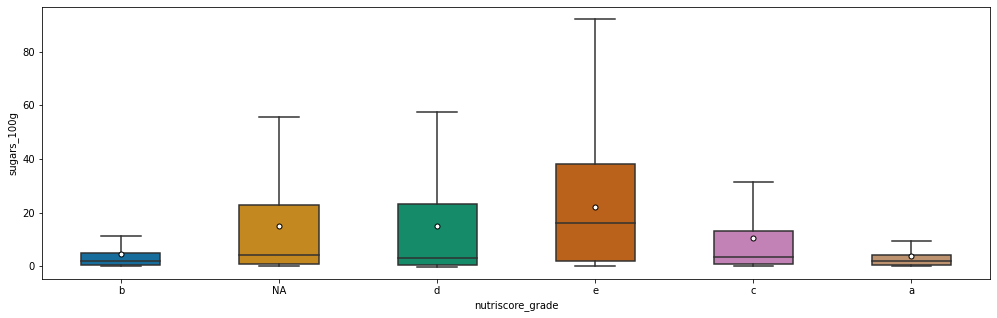

In [389]:
plt.figure(figsize=(17,5))
bpQtQl(data,'sugars_100g','nutriscore_grade')
plt.show()

#### Test ANOVA :<br>
Hypothèse Nulle H0 : La quantité moyenne de sucres n’est pas significativement différente suivant la note du nutriscore.

In [390]:
stats.kruskal(data[data['nutriscore_grade']=='a']['sugars_100g'],
               data[data['nutriscore_grade']=='b']['sugars_100g'],
               data[data['nutriscore_grade']=='c']['sugars_100g'],
               data[data['nutriscore_grade']=='d']['sugars_100g'],
               data[data['nutriscore_grade']=='e']['sugars_100g'],
              data[data['nutriscore_grade']=='NA']['sugars_100g'])

KruskalResult(statistic=24234.45611403243, pvalue=0.0)

Avec une pvalue de 0, <0.05, on peut donc rejetter l'hypothèse nulle d'égalité des moyennes : La quantité moyenne de sucres est donc significativment différente suivant la note du nutriscore.<br>
Pour affiner ce résultat on va réaliser un test de Mann-Whitney qui va tester l'égalité des moyenne de chaques paires de notes du nutriscore pour voir si la quantité moyenne de sucres est significativement différente entre chaques notes de nutriscore.

In [391]:
mannwhitney_pairs(data,'nutriscore_grade', 'sugars_100g', aff='all')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



e / NA 
 stat : 6997270645.5 p-value : 0.0 rejet : True
e / d 
 stat : 1751507248.5 p-value : 0.0 rejet : True
e / c 
 stat : 1117330067.5 p-value : 0.0 rejet : True
e / b 
 stat : 460063021.5 p-value : 0.0 rejet : True
e / a 
 stat : 490003312.0 p-value : 0.0 rejet : True
NA / d 
 stat : 13328426170.0 p-value : 1.929204761335167e-114 rejet : True
NA / c 
 stat : 9058182650.5 p-value : 7.007281850020259e-201 rejet : True
NA / b 
 stat : 4129845518.0 p-value : 0.0 rejet : True
NA / a 
 stat : 4460463913.5 p-value : 0.0 rejet : True
d / c 
 stat : 2517401403.0 p-value : 2.827002564122731e-13 rejet : True
d / b 
 stat : 1192370558.0 p-value : 0.0 rejet : True
d / a 
 stat : 1295587823.5 p-value : 0.0 rejet : True
c / b 
 stat : 818240070.5 p-value : 0.0 rejet : True
c / a 
 stat : 884929062.5 p-value : 0.0 rejet : True
b / a 
 stat : 614300437.0 p-value : 0.04182255845662637 rejet : True


On peut rejetter l'hypothèse nulle pour toutes les paires. La quantité moyenne de sucres est donc significativement différentes entre chaques paires de notes du nutriscore.

In [392]:
fillNaMean(data,'proteins_100g',dec=2)

##### B.2.c.3 - Salt (Sel) : <a name="B.2.c.3"></a>
Est-ce que certains groupes d'aliments, PNNS-1, présentent plus de sel que d'autres ?

In [393]:
modalMeans(data,'salt_100g','pnns_groups_1')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,pnns_groups_1,mean salt_100g
0,Fish Meat Eggs,1.988242
1,Fat And Sauces,1.897080
2,Salty Snacks,1.544945
3,Unknown,1.301157
4,Composite Foods,1.093228
5,Milk And Dairy Products,0.830432
6,Cereals And Potatoes,0.705896
7,Fruits And Vegetables,0.537557
8,Sugary Snacks,0.425214
9,Beverages,0.184189


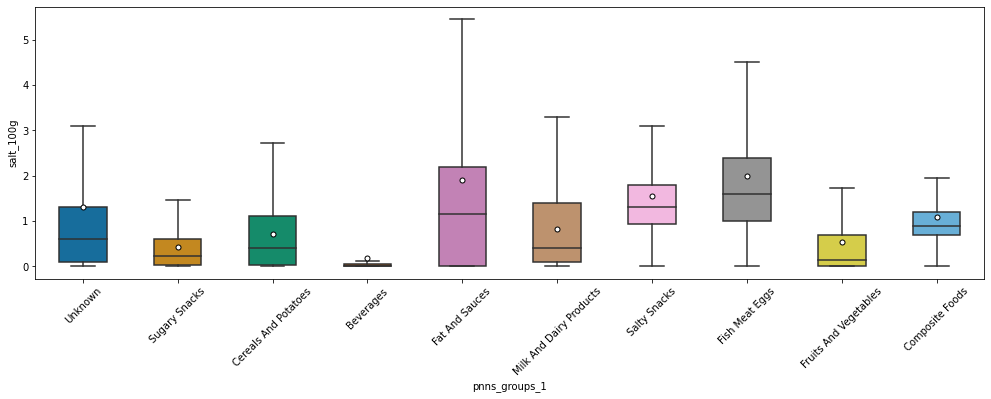

In [394]:
plt.figure(figsize=(17,5))
bpQtQl(data,'salt_100g','pnns_groups_1',rota=45)
plt.show()

#### Test ANOVA :<br>
Hypothèse Nulle H0 : La quantité moyenne de sel n’est pas significativement différente suivant le groupe pnns_1.

In [395]:
stats.kruskal(data[data['pnns_groups_1']=='Sugary Snacks']['salt_100g'],
               data[data['pnns_groups_1']=='Fish Meat Eggs']['salt_100g'],
               data[data['pnns_groups_1']=='Unknown']['salt_100g'],
               data[data['pnns_groups_1']=='Milk And Dairy Products']['salt_100g'],
               data[data['pnns_groups_1']=='Cereals And Potatoes']['salt_100g'],
               data[data['pnns_groups_1']=='Composite Foods']['salt_100g'],
               data[data['pnns_groups_1']=='Beverages']['salt_100g'],
               data[data['pnns_groups_1']=='Fat And Sauces']['salt_100g'],
               data[data['pnns_groups_1']=='Fruits And Vegetables']['salt_100g'],
               data[data['pnns_groups_1']=='Salty Snacks']['salt_100g'])

KruskalResult(statistic=84180.97409866439, pvalue=0.0)

Avec une pvalue de 0, <0.05, on peut donc rejetter l'hypothèse nulle d'égalité des moyennes : La quantité moyenne de sel est donc significativment différente suivant le groupe pnns_1.<br>
Pour affiner ce résultat on va réaliser un test de Mann-Whitney qui va tester l'égalité des moyenne de chaques paires de groupe pnns_1 pour voir si la quantité moyenne de sel est significativement différente entre chaques groupes pnns_1.

In [396]:
mannwhitney_pairs(data,'pnns_groups_1', 'salt_100g', aff='all')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Fish Meat Eggs / Fat And Sauces 
 stat : 316670775.0 p-value : 0.0 rejet : True
Fish Meat Eggs / Salty Snacks 
 stat : 305473421.0 p-value : 4.7130580687415516e-268 rejet : True
Fish Meat Eggs / Unknown 
 stat : 3618960281.0 p-value : 0.0 rejet : True
Fish Meat Eggs / Composite Foods 
 stat : 294110256.0 p-value : 0.0 rejet : True
Fish Meat Eggs / Milk And Dairy Products 
 stat : 328601327.0 p-value : 0.0 rejet : True
Fish Meat Eggs / Cereals And Potatoes 
 stat : 209369635.0 p-value : 0.0 rejet : True
Fish Meat Eggs / Fruits And Vegetables 
 stat : 106480832.0 p-value : 0.0 rejet : True
Fish Meat Eggs / Sugary Snacks 
 stat : 285424675.5 p-value : 0.0 rejet : True
Fish Meat Eggs / Beverages 
 stat : 36817110.5 p-value : 0.0 rejet : True
Fat And Sauces / Salty Snacks 
 stat : 165554652.5 p-value : 1.5313767050239383e-94 rejet : True
Fat And Sauces / Unknown 
 stat : 3064322946.5 p-value : 2.944122240783023e-162 rejet : True
Fat And Sauces / Composite Foods 
 stat : 248605092.5 p-value 

On peut rejetter l'hypothèse nulle pour toutes les paires. La quantité moyenne de sel est donc significativement différente entre chaques paires de groupe pnns_1.

##### Il y a t'il plus de sel dans les aliments les plus transformés ?

In [397]:
modalMeans(data,'salt_100g','nova_group')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,nova_group,mean salt_100g
0,3.0,1.351068
1,2.0,1.212212
2,0.0,1.211625
3,4.0,1.078502
4,1.0,0.245342


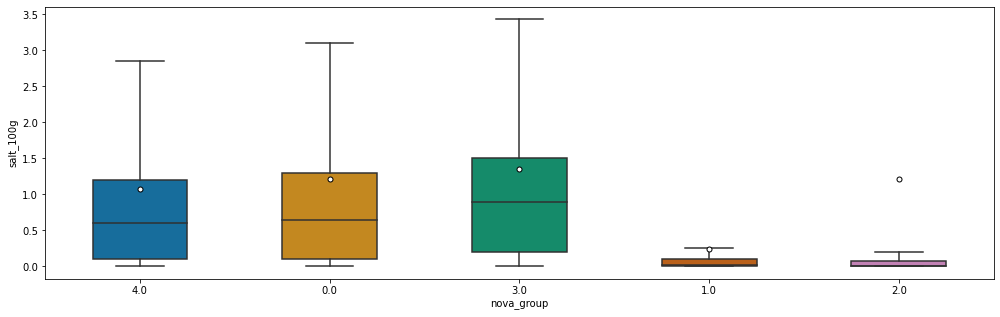

In [398]:
plt.figure(figsize=(17,5))
bpQtQl(data,'salt_100g','nova_group')
plt.show()

#### Test ANOVA :<br>
Hypothèse Nulle H0 : La quantité moyenne de sel n’est pas significativement différente suivant le degré de transformation.

In [399]:
stats.kruskal(data[data['nova_group']=='0.0']['salt_100g'],
               data[data['nova_group']=='1.0']['salt_100g'],
               data[data['nova_group']=='2.0']['salt_100g'],
               data[data['nova_group']=='3.0']['salt_100g'],
               data[data['nova_group']=='4.0']['salt_100g'])

KruskalResult(statistic=21757.849954592333, pvalue=0.0)

Avec une pvalue de 0, <0.05, on peut donc rejetter l'hypothèse nulle d'égalité des moyennes : La quantité moyenne de sel est donc significativment différente suivant le degré de transformation.<br>
Pour affiner ce résultat on va réaliser un test de Mann-Whitney qui va tester l'égalité des moyenne de chaques paires de nova_group pour voir si la quantité moyenne de sel est significativement différente entre chaques modalités de nova_group.

In [400]:
mannwhitney_pairs(data,'nova_group', 'salt_100g', aff='all')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



3.0 / 2.0 
 stat : 24586300.0 p-value : 0.0 rejet : True
3.0 / 0.0 
 stat : 7195422368.5 p-value : 0.0 rejet : True
3.0 / 4.0 
 stat : 2120932302.5 p-value : 0.0 rejet : True
3.0 / 1.0 
 stat : 99794043.0 p-value : 0.0 rejet : True
2.0 / 0.0 
 stat : 313107139.5 p-value : 0.0 rejet : True
2.0 / 4.0 
 stat : 87713437.5 p-value : 0.0 rejet : True
2.0 / 1.0 
 stat : 22549345.0 p-value : 1.3992188978116904e-40 rejet : True
0.0 / 4.0 
 stat : 25782783569.5 p-value : 1.3403737952810472e-05 rejet : True
0.0 / 1.0 
 stat : 1479142897.5 p-value : 0.0 rejet : True
4.0 / 1.0 
 stat : 384311918.0 p-value : 0.0 rejet : True


On peut rejetter l'hypothèse nulle pour toutes les paires. La quantité moyenne de sel est donc significativement différente entre chaques paires de modalités de nova_group.

##### Une forte proportion de sel est elle liée à un nutriscore élevé ?

In [401]:
modalMeans(data,'salt_100g','nutriscore_grade')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,nutriscore_grade,mean salt_100g
0,d,1.467553
1,NA,1.292982
2,e,1.212242
3,c,0.875318
4,b,0.560398
5,a,0.289971


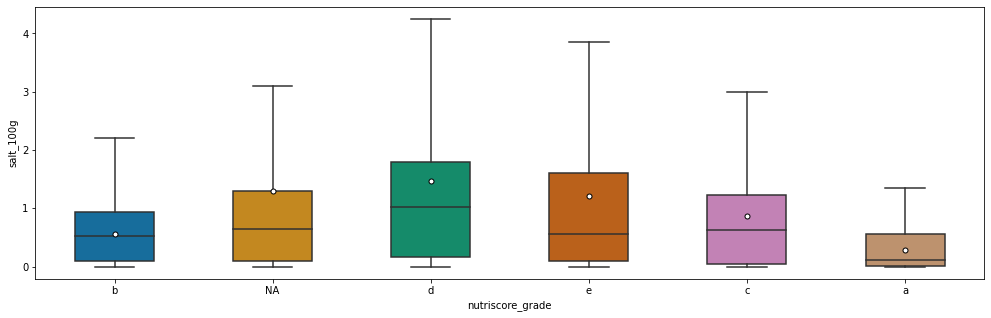

In [402]:
plt.figure(figsize=(17,5))
bpQtQl(data,'salt_100g','nutriscore_grade')
plt.show()

#### Test ANOVA :<br>
Hypothèse Nulle H0 : La quantité moyenne de sel n’est pas significativement différente suivant la note du nutriscore.

In [403]:
stats.kruskal(data[data['nutriscore_grade']=='a']['salt_100g'],
               data[data['nutriscore_grade']=='b']['salt_100g'],
               data[data['nutriscore_grade']=='c']['salt_100g'],
               data[data['nutriscore_grade']=='d']['salt_100g'],
               data[data['nutriscore_grade']=='e']['salt_100g'],
              data[data['nutriscore_grade']=='NA']['salt_100g'])

KruskalResult(statistic=26978.98345785959, pvalue=0.0)

Avec une pvalue de 0, <0.05, on peut donc rejetter l'hypothèse nulle d'égalité des moyennes : La quantité moyenne de sel est donc significativment différente suivant la note du nutriscore.<br>
Pour affiner ce résultat on va réaliser un test de Mann-Whitney qui va tester l'égalité des moyenne de chaques paires de note du nutriscore pour voir si la quantité moyenne de sel est significativement différente entre chaques note du nutriscore.

In [404]:
mannwhitney_pairs(data,'nutriscore_grade', 'salt_100g', aff='all')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



d / NA 
 stat : 11590619462.0 p-value : 0.0 rejet : True
d / e 
 stat : 2094547846.0 p-value : 0.0 rejet : True
d / c 
 stat : 1933403214.0 p-value : 0.0 rejet : True
d / b 
 stat : 947152537.0 p-value : 0.0 rejet : True
d / a 
 stat : 731107899.5 p-value : 0.0 rejet : True
NA / e 
 stat : 8862744925.5 p-value : 1.2172511926655775e-35 rejet : True
NA / c 
 stat : 9148375902.5 p-value : 1.1390708497789882e-156 rejet : True
NA / b 
 stat : 4697702432.0 p-value : 0.0 rejet : True
NA / a 
 stat : 3712337572.0 p-value : 0.0 rejet : True
e / c 
 stat : 1505191659.0 p-value : 4.784670513693295e-209 rejet : True
e / b 
 stat : 791839205.0 p-value : 0.0 rejet : True
e / a 
 stat : 621043086.0 p-value : 0.0 rejet : True
c / b 
 stat : 925147769.5 p-value : 1.9979788459207524e-101 rejet : True
c / a 
 stat : 748644571.5 p-value : 0.0 rejet : True
b / a 
 stat : 418359670.5 p-value : 0.0 rejet : True


On peut rejetter l'hypothèse nulle pour toutes les paires. La quantité moyenne de sel est donc significativement différente entre chaques paires de notes du nutriscore.

##### B.2.c.4 - Fibers (Fibres) : <a name="B.2.c.4"></a>
Est-ce que certains groupes d'aliments, PNNS-1, présentent plus de fibres que d'autres ?

In [405]:
modalMeans(data,'fiber_100g','pnns_groups_1')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,pnns_groups_1,mean fiber_100g
0,Cereals And Potatoes,3.302708
1,Fruits And Vegetables,1.767996
2,Salty Snacks,1.493024
3,Sugary Snacks,1.200338
4,Composite Foods,1.021835
5,Unknown,0.441696
6,Fat And Sauces,0.364372
7,Beverages,0.232865
8,Fish Meat Eggs,0.146576
9,Milk And Dairy Products,0.125389


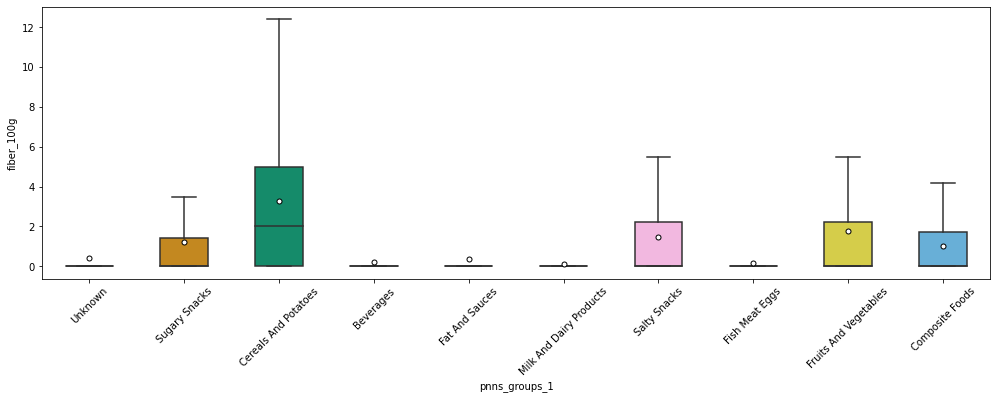

In [406]:
plt.figure(figsize=(17,5))
bpQtQl(data,'fiber_100g','pnns_groups_1',rota=45)
plt.show()

#### Test ANOVA :<br>
Hypothèse Nulle H0 : La quantité moyenne de fibres n’est pas significativement différente suivant le groupe d'aliment pnns_1.

In [407]:
stats.kruskal(data[data['pnns_groups_1']=='Sugary Snacks']['fiber_100g'],
               data[data['pnns_groups_1']=='Fish Meat Eggs']['fiber_100g'],
               data[data['pnns_groups_1']=='Unknown']['fiber_100g'],
               data[data['pnns_groups_1']=='Milk And Dairy Products']['fiber_100g'],
               data[data['pnns_groups_1']=='Cereals And Potatoes']['fiber_100g'],
               data[data['pnns_groups_1']=='Composite Foods']['fiber_100g'],
               data[data['pnns_groups_1']=='Beverages']['fiber_100g'],
               data[data['pnns_groups_1']=='Fat And Sauces']['fiber_100g'],
               data[data['pnns_groups_1']=='Fruits And Vegetables']['fiber_100g'],
               data[data['pnns_groups_1']=='Salty Snacks']['fiber_100g'])

KruskalResult(statistic=86216.67672862206, pvalue=0.0)

Avec une pvalue de 0, <0.05, on peut donc rejetter l'hypothèse nulle d'égalité des moyennes : La quantité moyenne de fibres est donc significativment différente suivant le groupe pnns_1.<br>
Pour affiner ce résultat on va réaliser un test de Mann-Whitney qui va tester l'égalité des moyenne de chaques paires de modalités du groupe pnns_1 pour voir si la quantité moyenne de fibres est significativement différente entre chaques groupes pnns_1.

In [408]:
mannwhitney_pairs(data,'pnns_groups_1', 'fiber_100g', aff='all')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Cereals And Potatoes / Fruits And Vegetables 
 stat : 205885761.0 p-value : 0.0 rejet : True
Cereals And Potatoes / Salty Snacks 
 stat : 177888799.5 p-value : 0.0 rejet : True
Cereals And Potatoes / Sugary Snacks 
 stat : 522835884.0 p-value : 0.0 rejet : True
Cereals And Potatoes / Composite Foods 
 stat : 243048812.0 p-value : 0.0 rejet : True
Cereals And Potatoes / Unknown 
 stat : 2294198536.0 p-value : 0.0 rejet : True
Cereals And Potatoes / Fat And Sauces 
 stat : 147421032.5 p-value : 0.0 rejet : True
Cereals And Potatoes / Beverages 
 stat : 152440984.0 p-value : 0.0 rejet : True
Cereals And Potatoes / Fish Meat Eggs 
 stat : 260026603.0 p-value : 0.0 rejet : True
Cereals And Potatoes / Milk And Dairy Products 
 stat : 223172580.5 p-value : 0.0 rejet : True
Fruits And Vegetables / Salty Snacks 
 stat : 151614305.0 p-value : 8.709340435411753e-142 rejet : True
Fruits And Vegetables / Sugary Snacks 
 stat : 454907502.5 p-value : 0.0 rejet : True
Fruits And Vegetables / Composite

On peut rejetter l'hypothèse nulle pour toutes les paires. La quantité moyenne de fibres est donc significativement différente entre chaques paires de groupes pnns_1.

##### Est-ce que la quantité de fibres est différente suivant le degré de transformation des aliments ?

In [409]:
modalMeans(data,'fiber_100g','nova_group')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,nova_group,mean fiber_100g
0,1.0,2.974333
1,3.0,1.589380
2,4.0,1.316354
3,0.0,0.330313
4,2.0,0.241578


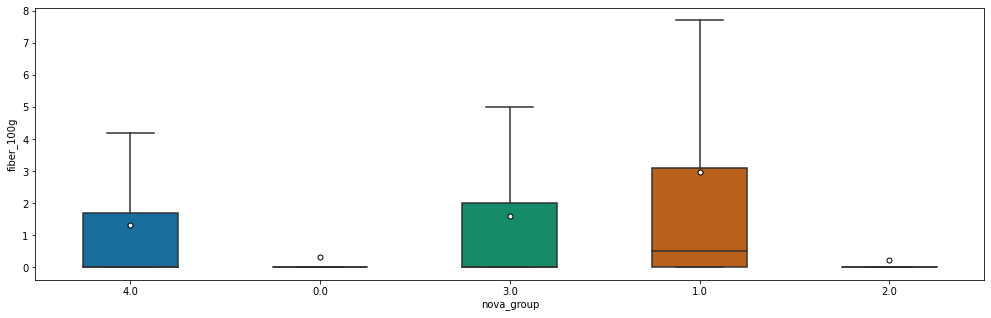

In [410]:
plt.figure(figsize=(17,5))
bpQtQl(data,'fiber_100g','nova_group',rota=0)
plt.show()

#### Test ANOVA :<br>
Hypothèse Nulle H0 : La quantité moyenne de fibres n’est pas significativement différente suivant le degré de transformation.

In [411]:
stats.kruskal(data[data['nova_group']=='0.0']['fiber_100g'],
               data[data['nova_group']=='1.0']['fiber_100g'],
               data[data['nova_group']=='2.0']['fiber_100g'],
               data[data['nova_group']=='3.0']['fiber_100g'],
               data[data['nova_group']=='4.0']['fiber_100g'])

KruskalResult(statistic=115271.74971295102, pvalue=0.0)

Avec une pvalue de 0, <0.05, on peut donc rejetter l'hypothèse nulle d'égalité des moyennes : La quantité moyenne de fibres est donc significativment différente suivant le degré de transformation.<br>
Pour affiner ce résultat on va réaliser un test de Mann-Whitney qui va tester l'égalité des moyenne de chaques paires de modalités du nova_group pour voir si la quantité moyenne de fibres est significativement différente entre chaques groupes NOVA.

In [412]:
mannwhitney_pairs(data, 'nova_group','fiber_100g')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1.0 / 3.0 
 stat : 274956852.5 p-value : 2.881247023655244e-276 rejet : True
1.0 / 4.0 
 stat : 851752444.0 p-value : 0.0 rejet : True
1.0 / 0.0 
 stat : 1725326345.5 p-value : 0.0 rejet : True
1.0 / 2.0 
 stat : 12924632.0 p-value : 0.0 rejet : True
3.0 / 4.0 
 stat : 2452764061.5 p-value : 7.899341725986392e-05 rejet : True
3.0 / 0.0 
 stat : 5446723272.5 p-value : 0.0 rejet : True
3.0 / 2.0 
 stat : 41180101.5 p-value : 1.1653623424516449e-288 rejet : True
4.0 / 0.0 
 stat : 16909305982.0 p-value : 0.0 rejet : True
4.0 / 2.0 
 stat : 127459212.0 p-value : 0.0 rejet : True
0.0 / 2.0 
 stat : 646955782.0 p-value : 0.04390864730215645 rejet : True


On peut rejetter l'hypothèse nulle pour toutes les paires. La quantité moyenne de fibres est donc significativement différente entre chaques paires de groupes NOVA.

##### Est-ce que la quantité de fibres est différente suivant la classe de nutriscore des aliments ?

In [413]:
modalMeans(data,'fiber_100g','nutriscore_grade')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,nutriscore_grade,mean fiber_100g
0,a,2.853287
1,c,1.110358
2,b,1.060970
3,d,0.644618
4,e,0.515644
5,NA,0.379233


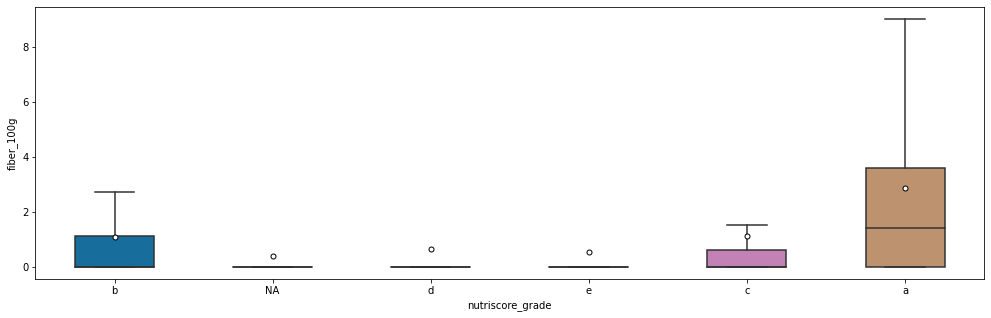

In [414]:
plt.figure(figsize=(17,5))
bpQtQl(data,'fiber_100g','nutriscore_grade',rota=0)
plt.show()

#### Test ANOVA :<br>
Hypothèse Nulle H0 : La quantité moyenne de fibres n’est pas significativement différente suivant la note du nutriscore.

In [415]:
stats.kruskal(data[data['nutriscore_grade']=='a']['fiber_100g'],
               data[data['nutriscore_grade']=='b']['fiber_100g'],
               data[data['nutriscore_grade']=='c']['fiber_100g'],
               data[data['nutriscore_grade']=='d']['fiber_100g'],
               data[data['nutriscore_grade']=='e']['fiber_100g'],
              data[data['nutriscore_grade']=='NA']['fiber_100g'])

KruskalResult(statistic=76194.99314143734, pvalue=0.0)

Avec une pvalue de 0, <0.05, on peut donc rejetter l'hypothèse nulle d'égalité des moyennes : La quantité moyenne de fibres est donc significativment différente suivant la note du nutriscore.<br>
Pour affiner ce résultat on va réaliser un test de Mann-Whitney qui va tester l'égalité des moyenne de chaques paires de note du nutriscore pour voir si la quantité moyenne de fibres est significativement différente entre chaques notes.

In [416]:
mannwhitney_pairs(data, 'nutriscore_grade','fiber_100g')

<ipython-input-354-0f156695502a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



a / c 
 stat : 755771599.0 p-value : 0.0 rejet : True
a / b 
 stat : 434928720.5 p-value : 0.0 rejet : True
a / d 
 stat : 926628606.0 p-value : 0.0 rejet : True
a / e 
 stat : 593765941.5 p-value : 0.0 rejet : True
a / NA 
 stat : 2995975283.5 p-value : 0.0 rejet : True
c / b 
 stat : 967232204.5 p-value : 6.718875846744969e-39 rejet : True
c / d 
 stat : 2301706399.0 p-value : 0.0 rejet : True
c / e 
 stat : 1493655834.0 p-value : 0.0 rejet : True
c / NA 
 stat : 7716146583.0 p-value : 0.0 rejet : True
b / d 
 stat : 1225233151.0 p-value : 0.0 rejet : True
b / e 
 stat : 794561509.5 p-value : 0.0 rejet : True
b / NA 
 stat : 4058356347.0 p-value : 0.0 rejet : True
d / e 
 stat : 2392854477.0 p-value : 0.03269236666098767 rejet : True
d / NA 
 stat : 12484047890.5 p-value : 0.0 rejet : True
e / NA 
 stat : 8172261489.0 p-value : 0.0 rejet : True


On peut rejetter l'hypothèse nulle pour toutes les paires. La quantité moyenne de fibres est donc significativement différente entre chaques paires de notes du nutriscore.

### B.3 - Qualitatives x Qualitatives (y.c Chi2) <a name="B.3"></a>
#### Certaines catégories d'aliments sont-elles plus transformés que d'autres ? (PNNS-1 x NOVA)

In [417]:
#fonction qui renvoie une table de contingence entre 2 variables

def contTable(df,v1,v2):
    cont = df[[v1,v2]].pivot_table(index=v1,columns=v2,aggfunc=len,margins=True,margins_name="Total")
    cont = cont.fillna(0)
    return cont

In [418]:
#fonction qui renvoie une heatmap de la table de contingence, colorée en fonction du degrès d'indépendance 
def contHeatMap(cont):
    tx = cont.loc[:,["Total"]]
    ty = cont.loc[["Total"],:]
    n = len(data)
    indep = tx.dot(ty) / n

    measure = (cont-indep)**2/indep
    xi_n = measure.sum().sum()
    table = measure/xi_n
    sns.heatmap(table.iloc[:-1,:-1],annot=cont.iloc[:-1,:-1])
    plt.show()

In [419]:
def contEffTheo(cont):
    tx = cont.loc[:,["Total"]]
    ty = cont.loc[["Total"],:]
    n = len(data)
    indep = np.around(tx.dot(ty) / n)
    return indep

In [420]:
#fonction qui réalise un test du chi2
def chi2(cont):
    st_chi2, st_p, st_dof, st_exp = stats.chi2_contingency(cont)
    print('stat du chi2:',st_chi2,' |degrès de liberté:',st_dof,' |p-value:',st_p)

In [421]:
X = "pnns_groups_1"
Y = "nova_group"

In [422]:
cont=contTable(data,X,Y)
cont

nova_group,0.0,1.0,2.0,3.0,4.0,Total
pnns_groups_1,,,,,,
Beverages,7206.0,3661.0,1.0,1705.0,8599.0,21172
Cereals And Potatoes,11043.0,4890.0,2.0,3620.0,7271.0,26826
Composite Foods,8641.0,0.0,0.0,3563.0,13162.0,25366
Fat And Sauces,11063.0,146.0,2189.0,2272.0,4870.0,20540
Fish Meat Eggs,23925.0,1319.0,2.0,4805.0,10571.0,40622
Fruits And Vegetables,8414.0,3207.0,4.0,4394.0,3071.0,19090
Milk And Dairy Products,15564.0,916.0,2.0,7137.0,10367.0,33986
Salty Snacks,8260.0,670.0,20.0,4925.0,4456.0,18331
Sugary Snacks,22105.0,95.0,827.0,3922.0,30381.0,57330


In [423]:
contEffTheo(cont)

nova_group,0.0,1.0,2.0,3.0,4.0,Total
pnns_groups_1,,,,,,
Beverages,14642.0,593.0,111.0,1398.0,4428.0,21172.0
Cereals And Potatoes,18552.0,752.0,141.0,1771.0,5611.0,26826.0
Composite Foods,17542.0,711.0,133.0,1675.0,5305.0,25366.0
Fat And Sauces,14205.0,575.0,108.0,1356.0,4296.0,20540.0
Fish Meat Eggs,28093.0,1138.0,213.0,2682.0,8496.0,40622.0
Fruits And Vegetables,13202.0,535.0,100.0,1260.0,3993.0,19090.0
Milk And Dairy Products,23504.0,952.0,178.0,2244.0,7108.0,33986.0
Salty Snacks,12677.0,514.0,96.0,1210.0,3834.0,18331.0
Sugary Snacks,39648.0,1606.0,301.0,3785.0,11990.0,57330.0


<AxesSubplot:xlabel='nova_group', ylabel='pnns_groups_1'>

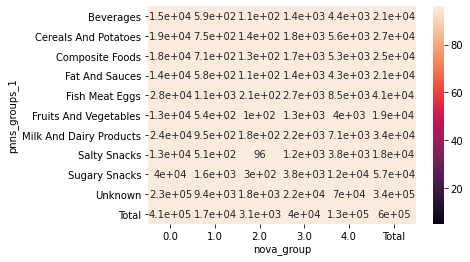

In [424]:
sns.heatmap(contEffTheo(cont), annot=True,vmax=5)

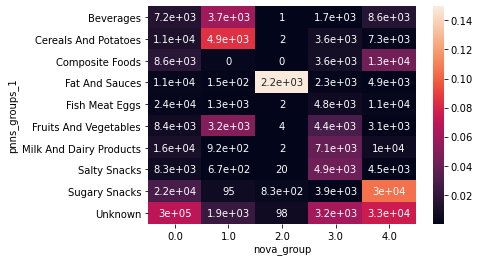

In [425]:
contHeatMap(cont)

In [426]:
chi2(cont)

stat du chi2: 268529.2930072089  |degrès de liberté: 50  |p-value: 0.0


#### Certaines catégories d'aliments présentes-elles un Nutriscore plus élevé que d'autres ? (PNNS-1 x Nutriscore)

In [427]:
X = "pnns_groups_1"
Y = "nutriscore_grade"

In [428]:
cont=contTable(data,X,Y)
cont

nutriscore_grade,NA,a,b,c,d,e,Total
pnns_groups_1,,,,,,,
Beverages,2785,357,2550,4748,3490,7242,21172
Cereals And Potatoes,1535,10668,4784,5064,4182,593,26826
Composite Foods,870,3920,7547,7577,4648,804,25366
Fat And Sauces,1901,827,762,6303,7107,3640,20540
Fish Meat Eggs,725,5169,5199,8035,13577,7917,40622
Fruits And Vegetables,1261,10477,2696,4006,594,56,19090
Milk And Dairy Products,841,2104,4597,7888,16564,1992,33986
Salty Snacks,311,697,1322,5037,7044,3920,18331
Sugary Snacks,3540,426,1037,6208,20837,25282,57330


In [429]:
contEffTheo(cont)

nutriscore_grade,NA,a,b,c,d,e,Total
pnns_groups_1,,,,,,,
Beverages,11556.0,1299.0,1189.0,2120.0,3030.0,1978.0,21172.0
Cereals And Potatoes,14642.0,1646.0,1506.0,2686.0,3839.0,2507.0,26826.0
Composite Foods,13845.0,1557.0,1424.0,2540.0,3630.0,2370.0,25366.0
Fat And Sauces,11211.0,1261.0,1153.0,2057.0,2940.0,1919.0,20540.0
Fish Meat Eggs,22172.0,2493.0,2280.0,4067.0,5814.0,3796.0,40622.0
Fruits And Vegetables,10420.0,1172.0,1072.0,1911.0,2732.0,1784.0,19090.0
Milk And Dairy Products,18550.0,2086.0,1908.0,3403.0,4864.0,3176.0,33986.0
Salty Snacks,10005.0,1125.0,1029.0,1835.0,2623.0,1713.0,18331.0
Sugary Snacks,31291.0,3518.0,3218.0,5740.0,8205.0,5357.0,57330.0


<AxesSubplot:xlabel='nutriscore_grade', ylabel='pnns_groups_1'>

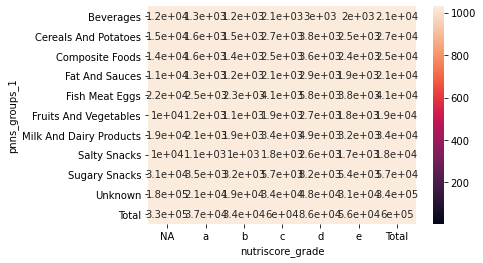

In [430]:
sns.heatmap(contEffTheo(cont), annot=True,vmax=5)

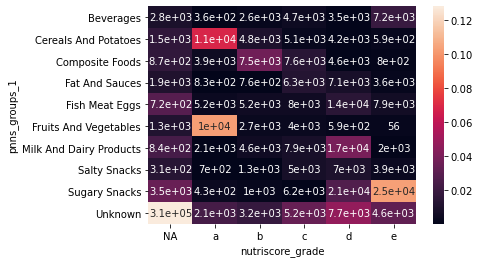

In [431]:
contHeatMap(cont)

In [432]:
chi2(cont)

stat du chi2: 717616.2856937579  |degrès de liberté: 60  |p-value: 0.0


#### Est-ce que le degré de transformation est lié au Nutriscore ? (NOVA x Nutriscore)

In [433]:
X = "nova_group"
Y = "nutriscore_grade"

In [434]:
cont=contTable(data,X,Y)
cont

nutriscore_grade,NA,a,b,c,d,e,Total
nova_group,,,,,,,
0.0,292793,14538,14074,27036,41609,24497,414547
1.0,1582,8242,2343,3018,1110,498,16793
2.0,794,30,10,728,746,837,3145
3.0,1923,6511,5256,7472,12377,6035,39574
4.0,30084,7467,11967,21764,29944,24143,125369
Total,327176,36788,33650,60018,85786,56010,599428


In [435]:
contEffTheo(cont)

nutriscore_grade,NA,a,b,c,d,e,Total
nova_group,,,,,,,
0.0,226265.0,25442.0,23271.0,41507.0,59327.0,38735.0,414547.0
1.0,9166.0,1031.0,943.0,1681.0,2403.0,1569.0,16793.0
2.0,1717.0,193.0,177.0,315.0,450.0,294.0,3145.0
3.0,21600.0,2429.0,2222.0,3962.0,5664.0,3698.0,39574.0
4.0,68428.0,7694.0,7038.0,12553.0,17942.0,11714.0,125369.0
Total,327176.0,36788.0,33650.0,60018.0,85786.0,56010.0,599428.0


<AxesSubplot:xlabel='nutriscore_grade', ylabel='nova_group'>

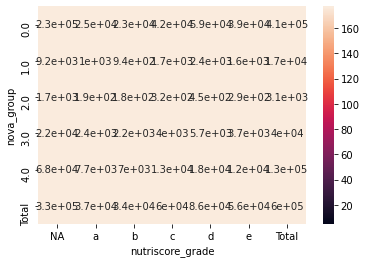

In [436]:
sns.heatmap(contEffTheo(cont), annot=True,vmax=5)

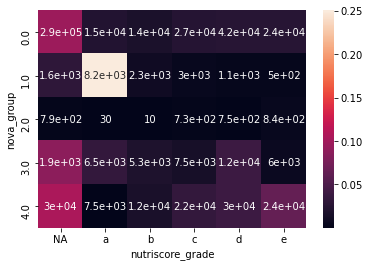

In [437]:
contHeatMap(cont)

In [438]:
chi2(cont)

stat du chi2: 201668.71405775522  |degrès de liberté: 30  |p-value: 0.0


## C- Analyse Multivariée : ACP - Nutriments & Energie <a name="C"></a>
On importe les fonctions depuis la bibliothèque sklearn :

In [439]:
from sklearn import decomposition
from sklearn import preprocessing 

### Préparation des données

In [440]:
#creation d'un dataframe 'PCA' qui récupère les données que l'on veux analyser
dataPCA = pd.DataFrame(data=data, columns=['pnns_groups_1','nova_group','nutriscore_grade','fiber_100g','fat_100g',
                                           'saturated_fat','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g','kcal'])
dataPCA

,pnns_groups_1,nova_group,nutriscore_grade,fiber_100g,fat_100g,saturated_fat,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,kcal
0,Unknown,4.0,b,1.5,15.0,4.00,70.0,0.00,7.8,0.4600,426.00
1,Unknown,0.0,NA,0.0,0.0,0.00,0.0,0.00,8.0,5.0000,1.00
2,Sugary Snacks,4.0,d,3.0,15.0,8.80,72.0,22.00,8.2,0.9000,457.00
3,Cereals And Potatoes,4.0,d,5.8,15.3,8.30,62.7,23.70,8.0,0.2300,434.00
4,Unknown,0.0,NA,0.0,27.8,3.80,53.0,46.30,9.4,0.2000,513.00
...,...,...,...,...,...,...,...,...,...,...,...
599423,Fruits And Vegetables,3.0,NA,0.0,0.1,5.53,12.2,14.01,2.4,1.1700,58.99
599424,Fish Meat Eggs,3.0,e,0.0,19.0,7.80,1.0,1.00,27.0,5.5118,281.60
599425,Unknown,3.0,NA,0.0,16.0,5.53,6.0,14.01,7.0,1.1700,194.18
599426,Unknown,3.0,NA,0.0,17.9,5.53,6.4,14.01,7.0,1.1700,212.57


In [441]:
#on créer un dataframe avec uniquement les variables quantitatives
PCA_X = pd.DataFrame(data=dataPCA, columns=['fiber_100g','fat_100g','saturated_fat','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g','kcal'])

In [442]:
#on récupère les valeurs des variables quantitatives
X = PCA_X.values

In [443]:
#on récupère le nombre d'individus
n=len(X)

In [444]:
#on récupère le noms des variables
features = PCA_X.columns

### Réalisation de l'ACP
#### Centrage & Réduction des valeurs

In [445]:
# On centre et réduit les valeurs numériques
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

#### Calcul des composantes principales
nombre des composantes principale = nombre de variables quantitatives = 8.

In [446]:
# Calcul des composantes principales
pca = decomposition.PCA()
pca.fit(X_scaled)

PCA()

In [447]:
#nombre de composantes calculées
ncomp=pca.n_components_
ncomp

8

#### Calcul des valeurs propres
somme de valeurs propres = nombre des composantes principales

In [448]:
#variance expliquée / eigen values
eigval=pca.explained_variance_
print(pd.DataFrame(eigval))

          0
0  2.420113
1  1.996799
2  1.052096
3  0.976407
4  0.811501
5  0.412337
6  0.270081
7  0.060680


In [449]:
#calcul de la somme des eigen values (doit être égale à ncomp) 
sum(eigval)

8.000013346078793

#### Proportion de variance expliquée par chaques valeurs propres

In [450]:
#proportion de variance expliquée
propEigval=pca.explained_variance_ratio_
propEigval
print(pd.DataFrame(propEigval.cumsum()))

          0
0  0.302514
1  0.552113
2  0.683625
3  0.805675
4  0.907113
5  0.958655
6  0.992415
7  1.000000


In [451]:
np.around(propEigval[0]+propEigval[1]+propEigval[2],2)

0.68

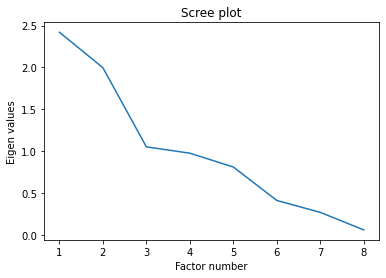

In [452]:
#scree plot
plt.plot(np.arange(1,ncomp+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

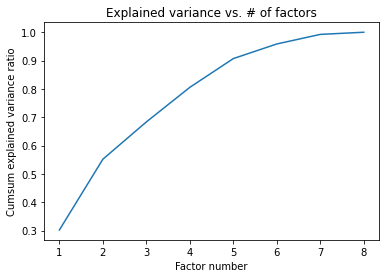

In [453]:
#cumul de variance expliquée
plt.plot(np.arange(1,ncomp+1),np.cumsum(propEigval))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [454]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

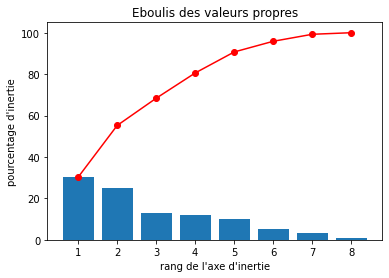

In [455]:
display_scree_plot(pca)

On observes un 'coude' au niveau de l'axe 3, on ne retiens donc que 3 axes pour 69% de variance expliquée, pour l'analyse de l'ACP.
#### Analyse des variables 
##### Corrélations des variables aux axes

In [456]:
sqrt_eigval = np.sqrt(eigval)

#p = nb de variables = 8
p = 8

corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]

In [457]:
def showNcol(df, ncol,nom_col, feature):
    df_res=pd.DataFrame({'id':feature})
    for i in range(ncol):
        num=str(i+1)
        df_res.insert(i+1,nom_col+'_'+num,df[:,i], allow_duplicates=False)
    return df_res

In [458]:
#on affiche pour les 3 axes :
df_corvar=showNcol(corvar,3,'COR', feature=features)
df_corvar

,id,COR_1,COR_2,COR_3
0,fiber_100g,0.056166,-0.094831,0.868474
1,fat_100g,0.870299,0.321392,-0.114462
2,saturated_fat,0.807558,0.252551,-0.164559
3,carbohydrates_100g,0.246775,-0.868066,0.158155
4,sugars_100g,0.250217,-0.844372,-0.049096
5,proteins_100g,0.161517,0.518983,0.416352
6,salt_100g,-0.044849,0.258070,0.213013
7,kcal,0.925085,-0.135218,0.107330


In [459]:
df_corvar.sort_values(by=['COR_1'], ascending=False)

,id,COR_1,COR_2,COR_3
7,kcal,0.925085,-0.135218,0.107330
1,fat_100g,0.870299,0.321392,-0.114462
2,saturated_fat,0.807558,0.252551,-0.164559
4,sugars_100g,0.250217,-0.844372,-0.049096
3,carbohydrates_100g,0.246775,-0.868066,0.158155
5,proteins_100g,0.161517,0.518983,0.416352
0,fiber_100g,0.056166,-0.094831,0.868474
6,salt_100g,-0.044849,0.258070,0.213013


In [460]:
df_corvar.sort_values(by=['COR_2'], ascending=False)

,id,COR_1,COR_2,COR_3
5,proteins_100g,0.161517,0.518983,0.416352
1,fat_100g,0.870299,0.321392,-0.114462
6,salt_100g,-0.044849,0.258070,0.213013
2,saturated_fat,0.807558,0.252551,-0.164559
0,fiber_100g,0.056166,-0.094831,0.868474
7,kcal,0.925085,-0.135218,0.107330
4,sugars_100g,0.250217,-0.844372,-0.049096
3,carbohydrates_100g,0.246775,-0.868066,0.158155


In [461]:
df_corvar.sort_values(by=['COR_3'], ascending=False)

,id,COR_1,COR_2,COR_3
0,fiber_100g,0.056166,-0.094831,0.868474
5,proteins_100g,0.161517,0.518983,0.416352
6,salt_100g,-0.044849,0.258070,0.213013
3,carbohydrates_100g,0.246775,-0.868066,0.158155
7,kcal,0.925085,-0.135218,0.107330
4,sugars_100g,0.250217,-0.844372,-0.049096
1,fat_100g,0.870299,0.321392,-0.114462
2,saturated_fat,0.807558,0.252551,-0.164559


##### Cosinus carré des variables 

In [462]:
#cosinus carré des variables
cos2var = corvar**2
df_cos2var = showNcol(cos2var,3,'COS2', feature=features)
df_cos2var

,id,COS2_1,COS2_2,COS2_3
0,fiber_100g,0.003155,0.008993,0.754248
1,fat_100g,0.757421,0.103293,0.013102
2,saturated_fat,0.652150,0.063782,0.027080
3,carbohydrates_100g,0.060898,0.753539,0.025013
4,sugars_100g,0.062609,0.712965,0.002410
5,proteins_100g,0.026088,0.269343,0.173349
6,salt_100g,0.002011,0.066600,0.045375
7,kcal,0.855782,0.018284,0.011520


In [463]:
np.sum(cos2var, axis=1)

array([1.00000167, 1.00000167, 1.00000167, 1.00000167, 1.00000167,
       1.00000167, 1.00000167, 1.00000167])

In [464]:
df_cos2var.sort_values(by=['COS2_1'], ascending=False)

,id,COS2_1,COS2_2,COS2_3
7,kcal,0.855782,0.018284,0.011520
1,fat_100g,0.757421,0.103293,0.013102
2,saturated_fat,0.652150,0.063782,0.027080
4,sugars_100g,0.062609,0.712965,0.002410
3,carbohydrates_100g,0.060898,0.753539,0.025013
5,proteins_100g,0.026088,0.269343,0.173349
0,fiber_100g,0.003155,0.008993,0.754248
6,salt_100g,0.002011,0.066600,0.045375


In [465]:
df_cos2var.sort_values(by=['COS2_2'], ascending=False)

,id,COS2_1,COS2_2,COS2_3
3,carbohydrates_100g,0.060898,0.753539,0.025013
4,sugars_100g,0.062609,0.712965,0.002410
5,proteins_100g,0.026088,0.269343,0.173349
1,fat_100g,0.757421,0.103293,0.013102
6,salt_100g,0.002011,0.066600,0.045375
2,saturated_fat,0.652150,0.063782,0.027080
7,kcal,0.855782,0.018284,0.011520
0,fiber_100g,0.003155,0.008993,0.754248


In [466]:
df_cos2var.sort_values(by=['COS2_3'], ascending=False)

,id,COS2_1,COS2_2,COS2_3
0,fiber_100g,0.003155,0.008993,0.754248
5,proteins_100g,0.026088,0.269343,0.173349
6,salt_100g,0.002011,0.066600,0.045375
2,saturated_fat,0.652150,0.063782,0.027080
3,carbohydrates_100g,0.060898,0.753539,0.025013
1,fat_100g,0.757421,0.103293,0.013102
7,kcal,0.855782,0.018284,0.011520
4,sugars_100g,0.062609,0.712965,0.002410


##### Contribution des variables 

In [467]:
#contributions des variables
ctrvar = 0
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]

In [468]:
#on n'affiche les 3 premiers axes
contrib=showNcol(ctrvar,3,'CTR', feature=features)
contrib

,id,CTR_1,CTR_2,CTR_3
0,fiber_100g,0.001304,0.004504,0.716901
1,fat_100g,0.312969,0.051729,0.012453
2,saturated_fat,0.269471,0.031942,0.025739
3,carbohydrates_100g,0.025163,0.377373,0.023775
4,sugars_100g,0.025870,0.357054,0.002291
5,proteins_100g,0.010780,0.134887,0.164765
6,salt_100g,0.000831,0.033353,0.043128
7,kcal,0.353612,0.009157,0.010949


In [469]:
np.sum(ctrvar, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [470]:
sum(contrib['CTR_1'])

0.9999999999999993

#### Analyse des Individus
##### Contribution des individus dans l'inertie totale

In [471]:
#contribution des individus dans l'inertie totale
di = np.sum(X_scaled**2,axis=1)
indContrib=pd.DataFrame({'d_i':di})
indContrib

,d_i
0,3.616249
1,6.398404
2,4.511754
3,6.241095
4,5.750245
...,...
599423,2.904603
599424,6.725319
599425,0.940562
599426,0.867980


##### Cosinus carré des individus

In [472]:
#qualité de représentation des individus - COS2
cos2ind = X_scaled**2
for j in range(p):
    cos2ind[:,j] = cos2ind[:,j]/di
print(pd.DataFrame({'COS2_1':cos2ind[:,0],'COS2_2':cos2ind[:,1],'COS2_3':cos2ind[:,2]}))

          COS2_1    COS2_2        COS2_3
0       0.024269  0.000345  1.008326e-02
1       0.010130  0.106139  7.486375e-02
2       0.159039  0.000276  3.733565e-02
3       0.563483  0.000442  1.937998e-02
4       0.011271  0.102754  8.114632e-03
...          ...       ...           ...
599423  0.022314  0.230568  1.862660e-07
599424  0.009637  0.010402  1.208921e-02
599425  0.068909  0.009119  5.752182e-07
599426  0.074671  0.046764  6.233192e-07
599427  0.000541  0.067979  4.961746e-02

[599428 rows x 3 columns]


In [473]:
df_cos2ind=showNcol(cos2ind,3,'COS2', feature=data.index)
df_cos2ind

,id,COS2_1,COS2_2,COS2_3
0,0,0.024269,0.000345,1.008326e-02
1,1,0.010130,0.106139,7.486375e-02
2,2,0.159039,0.000276,3.733565e-02
3,3,0.563483,0.000442,1.937998e-02
4,4,0.011271,0.102754,8.114632e-03
...,...,...,...,...
599423,599423,0.022314,0.230568,1.862660e-07
599424,599424,0.009637,0.010402,1.208921e-02
599425,599425,0.068909,0.009119,5.752182e-07
599426,599426,0.074671,0.046764,6.233192e-07


In [474]:
print(np.sum(cos2ind,axis=1))

[1. 1. 1. ... 1. 1. 1.]


##### Contribution des individus aux axes

In [475]:
X_projected = pca.transform(X_scaled)

In [476]:
#contributions des individus aux axes
ctrInd = X_projected**2
for j in range(p):
    ctrInd[:,j] = ctrInd[:,j]/(n*eigval[j])
print(pd.DataFrame({'CTR_1':ctrInd[:,0],'CTR_2':ctrInd[:,1],'CTR_3':ctrInd[:,2]}))

               CTR_1         CTR_2         CTR_3
0       1.834041e-07  4.437166e-07  4.514465e-07
1       2.859944e-06  9.394305e-07  1.053361e-08
2       8.867219e-07  1.482990e-06  1.355508e-06
3       7.448246e-07  1.383083e-06  4.490870e-06
4       1.473513e-06  1.950870e-06  2.206668e-08
...              ...           ...           ...
599423  1.222858e-06  1.485105e-09  5.798924e-07
599424  2.252877e-08  3.417183e-06  5.980179e-07
599425  9.923049e-08  1.995102e-07  3.597362e-07
599426  4.578399e-08  2.048276e-07  3.591707e-07
599427  3.455228e-07  2.896388e-06  2.517873e-08

[599428 rows x 3 columns]


In [477]:
df_ctrInd=showNcol(ctrInd,3,'CTR', feature=data.index)
df_ctrInd

,id,CTR_1,CTR_2,CTR_3
0,0,1.834041e-07,4.437166e-07,4.514465e-07
1,1,2.859944e-06,9.394305e-07,1.053361e-08
2,2,8.867219e-07,1.482990e-06,1.355508e-06
3,3,7.448246e-07,1.383083e-06,4.490870e-06
4,4,1.473513e-06,1.950870e-06,2.206668e-08
...,...,...,...,...
599423,599423,1.222858e-06,1.485105e-09,5.798924e-07
599424,599424,2.252877e-08,3.417183e-06,5.980179e-07
599425,599425,9.923049e-08,1.995102e-07,3.597362e-07
599426,599426,4.578399e-08,2.048276e-07,3.591707e-07


In [478]:
sum(df_ctrInd['CTR_1'])

0.9999983317428791

In [479]:
print(np.sum(ctrInd,axis=0))

[0.99999833 0.99999833 0.99999833 0.99999833 0.99999833 0.99999833
 0.99999833 0.99999833]


#### Visualisations
##### Cercle des corrélations

In [480]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

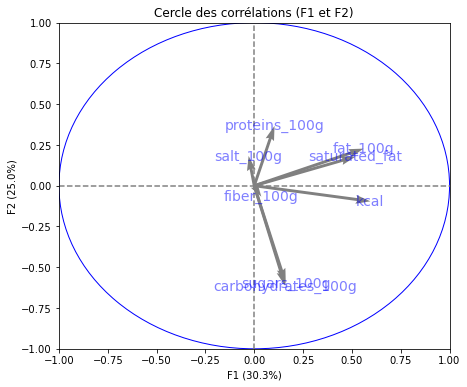

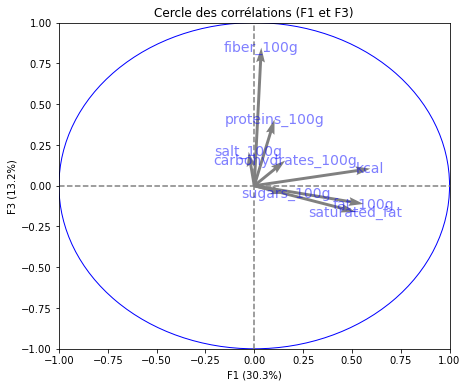

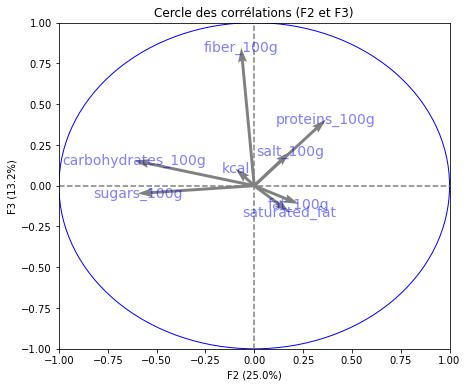

In [481]:
pcs=pca.components_
display_circles(pcs,3,pca,[(0,1),(0,2),(1,2)],labels=np.array(features))

##### Projections des individus

In [482]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

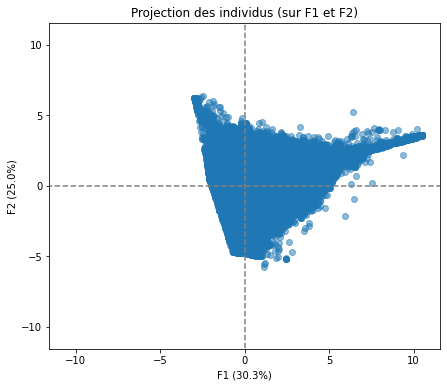

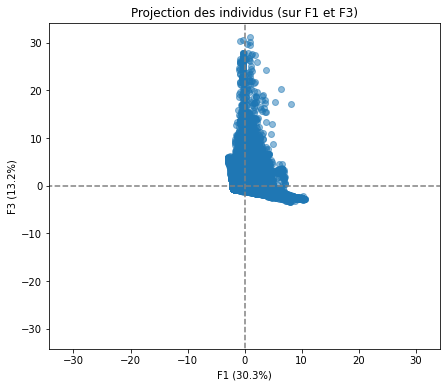

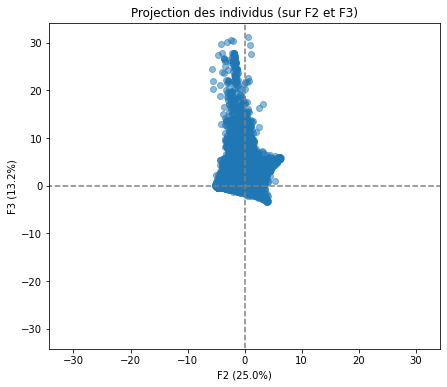

In [483]:
# Projection des individus
display_factorial_planes(X_projected, 3, pca, [(0,1),(0,2),(1,2)], alpha = 0.5)

In [484]:
msk=dataPCA['nova_group'][dataPCA['nova_group']!='0.0']

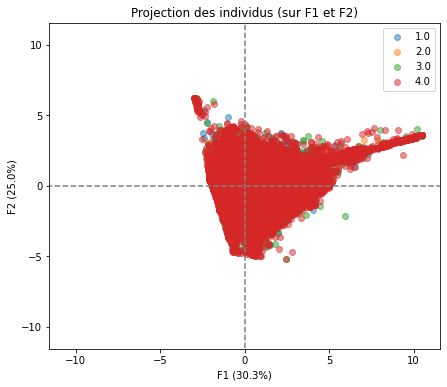

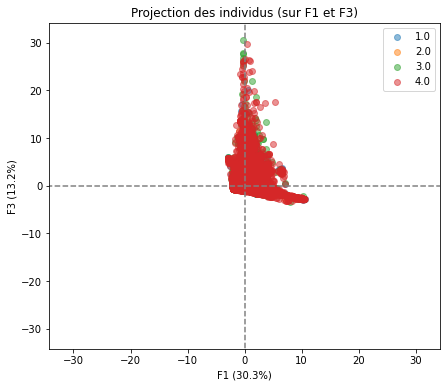

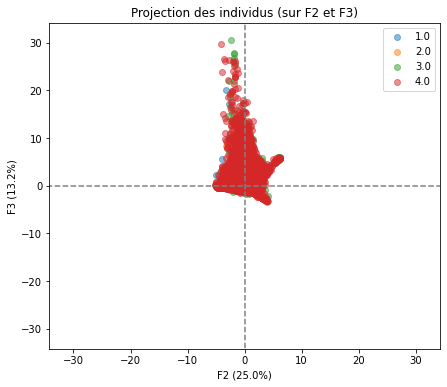

In [485]:
display_factorial_planes(X_projected, 3, pca, [(0,1),(0,2),(1,2)], illustrative_var=msk,alpha = 0.5)

In [486]:
msk=dataPCA['pnns_groups_1'][dataPCA['pnns_groups_1']!='Unknown']

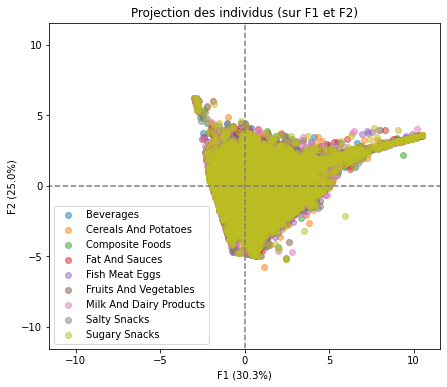

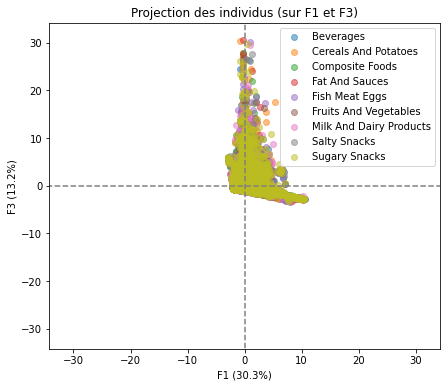

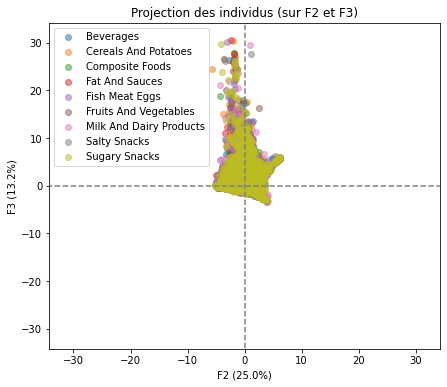

In [487]:
display_factorial_planes(X_projected, 3, pca, [(0,1),(0,2),(1,2)], illustrative_var=msk,alpha = 0.5)

In [488]:
msk=dataPCA['nutriscore_grade'][dataPCA['nutriscore_grade']!='NA']

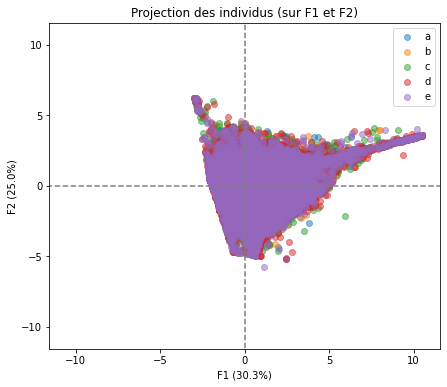

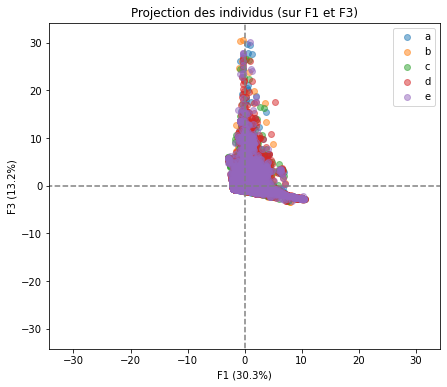

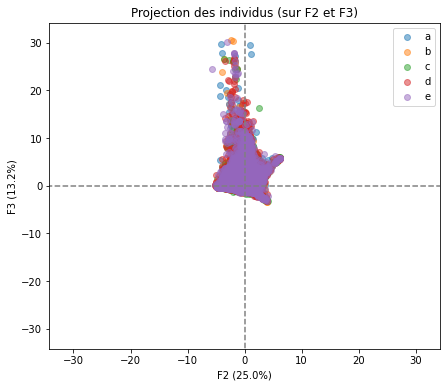

In [489]:
display_factorial_planes(X_projected, 3, pca, [(0,1),(0,2),(1,2)], illustrative_var=msk,alpha = 0.5)

## D- Prototypage Application <a name="D"></a>

Besoin en calories : [Source](https://fr.wikipedia.org/wiki/M%C3%A9tabolisme_de_base#Mod%C3%A8les)

In [490]:
#fonction qui calcule le besoin en calories + répartition
#coef_act : sedentaire:1.37 / actif:1.55 / sportif:1.8 - 2.0
def kcalJourna(sexe, poids,taille,age,coef_act):
    kcal=(poids**0.48)*(taille**0.5)*(age**(-0.13))
    if sexe=='F':
        kcal=kcal*230
    elif sexe=='M':
        kcal=kcal*259
    kcal=kcal*coef_act
    return np.around(kcal,0)

In [491]:
kcal_test=kcalJourna('M',75,1.87,26,1.37)
kcal_test

2524.0

In [492]:
#fonction qui ajoute des aliments consommés dans un tableau
def AddAlimentConso(source,df_quoti,code,quantite):
    df_quoti=df_quoti.append({'code':code},ignore_index=True)#ajout ligne et valorisation du code barre
    
    #ajout nom produit
    valeur=source['product_name'][source['code']==code].reset_index(drop=True)
    df_quoti['product_name'][df_quoti['code']==code]=valeur[0]
    
    #ajout quantite
    df_quoti['quantite'][df_quoti['code']==code]=quantite
    
    #ajout nova groupe
    valeur=source['nova_group'][source['code']==code].reset_index(drop=True)
    df_quoti['nova_group'][df_quoti['code']==code]=valeur[0]
    
    #ajout nutriscore
    valeur=source['nutriscore_grade'][source['code']==code].reset_index(drop=True)
    df_quoti['nutriscore_grade'][df_quoti['code']==code]=valeur[0]
    
    #ajout des fibres&kcal pour la qtte selectionnée
    valeur=source['fiber_100g'][source['code']==code].reset_index(drop=True)
    valcalc=valeur[0]*quantite/100
    df_quoti['fibres'][df_quoti['code']==code]=valcalc
    df_quoti['kcal_fibres'][df_quoti['code']==code]=valcalc*2
    
    #ajout des lipides dont graisse saturée &kcal pour la qtte selectionnée
        #graisse dont graisse saturée
    valeur=source['fat_100g'][source['code']==code].reset_index(drop=True)
    valcalc=valeur[0]*quantite/100
    
        #graisses saturée
    valeur=source['saturated_fat'][source['code']==code].reset_index(drop=True)
    valcalcinclue=valeur[0]*quantite/100
    
        #lipides uniquement
    valunique=valcalc-valcalcinclue
    
        #valorisation
    df_quoti['lipides'][df_quoti['code']==code]=valunique
    df_quoti['kcal_lipides'][df_quoti['code']==code]=valunique*9
    
    df_quoti['graisses_saturees'][df_quoti['code']==code]=valcalcinclue
    df_quoti['kcal_saturees'][df_quoti['code']==code]=valcalcinclue*9
    
    #ajout des glucides dont sucres &kcal pour la qtte selectionnée
        #glucides dont sucres
    valeur=source['carbohydrates_100g'][source['code']==code].reset_index(drop=True)
    valcalc=valeur[0]*quantite/100
    
        #sucres
    valeur=source['sugars_100g'][source['code']==code].reset_index(drop=True)
    valcalcinclue=valeur[0]*quantite/100
    
        #glucides uniquement
    valunique=valcalc-valcalcinclue
    
        #valorisation
    df_quoti['glucides'][df_quoti['code']==code]=valunique
    df_quoti['kcal_glucides'][df_quoti['code']==code]=valunique*4
    
    df_quoti['sucres'][df_quoti['code']==code]=valcalcinclue
    df_quoti['kcal_sucres'][df_quoti['code']==code]=valcalcinclue*4
    
    #ajout des proteines&kcal pour la qtte selectionnée
    valeur=source['proteins_100g'][source['code']==code].reset_index(drop=True)
    valcalc=valeur[0]*quantite/100
    df_quoti['proteines'][df_quoti['code']==code]=valcalc
    df_quoti['kcal_proteines'][df_quoti['code']==code]=valcalc*4
    
    #ajout du sel pour la qtte selectionnée
    valeur=source['salt_100g'][source['code']==code].reset_index(drop=True)
    valcalc=valeur[0]*quantite/100
    df_quoti['sel'][df_quoti['code']==code]=valcalc
    
    #ajout des calories pour la qtte selectionnée
    valeur=source['kcal'][source['code']==code].reset_index(drop=True)
    df_quoti['kcal'][df_quoti['code']==code]=valeur[0]*quantite/100
    
    return df_quoti

In [493]:
kcalConsoQuoti = pd.DataFrame(columns=['code','product_name','quantite','nova_group','nutriscore_grade','kcal',
                                      'fibres','kcal_fibres','lipides','kcal_lipides','graisses_saturees','kcal_saturees',
                                      'glucides','kcal_glucides','sucres','kcal_sucres','proteines','kcal_proteines','sel'])

In [494]:
kcalConsoQuoti

,code,product_name,quantite,nova_group,nutriscore_grade,kcal,fibres,kcal_fibres,lipides,kcal_lipides,graisses_saturees,kcal_saturees,glucides,kcal_glucides,sucres,kcal_sucres,proteines,kcal_proteines,sel


In [495]:
#fonction qui renvoie l'axe sur lequel l'aliment contribue le plus
def maxContrib(data,df_ctrInd,code):
    idx=data[data['code']==code].index[0]#on récupère l'index du produit
    ctrib=0

    for i in range(3):
        ncol=i+1
        if df_ctrInd.iloc[idx,ncol] > ctrib:
            ctrib=df_ctrInd.iloc[idx,ncol]
            maxcol=ncol

    nomcol=df_ctrInd.columns[maxcol]
    tabsupmoy=df_ctrInd[df_ctrInd[nomcol]>(sum(df_ctrInd[nomcol])/len(df_ctrInd[nomcol]))]
    if len(tabsupmoy[tabsupmoy.index.isin([idx])==True]) == 1:
        classee=tabsupmoy.sort_values(by=[nomcol],ascending=False).reset_index(drop=True)
        rang=classee[classee['id']==idx].index[0]
        top=np.around(rang/len(classee)*100)
        print("Contribue le plus à l'axe :",maxcol,"\n C'est le",rang,"ième produit participant le plus à cet axe, \n il fait partie des",top,"% des produits participant le plus à l'axe, \n(",len(classee),"produits participant plus que la moyenne)")
    else:
        print("Le produit ne se détache pas particulierement")

In [496]:
maxContrib(data,df_ctrInd,'7622210713889')#belvita

Contribue le plus à l'axe : 3 
 C'est le 26305 ième produit participant le plus à cet axe, 
 il fait partie des 45.0 % des produits participant le plus à l'axe, 
( 58272 produits participant plus que la moyenne)


In [497]:
maxContrib(data,df_ctrInd,'3017620422003')#nutella

Contribue le plus à l'axe : 1 
 C'est le 57594 ième produit participant le plus à cet axe, 
 il fait partie des 30.0 % des produits participant le plus à l'axe, 
( 195205 produits participant plus que la moyenne)


In [498]:
maxContrib(data,df_ctrInd,'3330720237361')#pate a tartiner du lot et garonne, sans huile

Contribue le plus à l'axe : 1 
 C'est le 48267 ième produit participant le plus à cet axe, 
 il fait partie des 25.0 % des produits participant le plus à l'axe, 
( 195205 produits participant plus que la moyenne)


In [499]:
maxContrib(data,df_ctrInd,'20968663')#pate a tartiner bio, sans huile de palme

Contribue le plus à l'axe : 1 
 C'est le 77140 ième produit participant le plus à cet axe, 
 il fait partie des 40.0 % des produits participant le plus à l'axe, 
( 195205 produits participant plus que la moyenne)


In [500]:
maxContrib(data,df_ctrInd,'8076800195057')#spagh

Contribue le plus à l'axe : 3 
 C'est le 40465 ième produit participant le plus à cet axe, 
 il fait partie des 69.0 % des produits participant le plus à l'axe, 
( 58272 produits participant plus que la moyenne)


In [501]:
maxContrib(data,df_ctrInd,'8076809529419')#spagh completes

Contribue le plus à l'axe : 3 
 C'est le 11973 ième produit participant le plus à cet axe, 
 il fait partie des 21.0 % des produits participant le plus à l'axe, 
( 58272 produits participant plus que la moyenne)


Petit Dej : 5 belvita + 1 banane

In [502]:
kcalConsoQuoti=AddAlimentConso(data,kcalConsoQuoti,'7622210713889',68) #5 belvita

In [503]:
kcalConsoQuoti=AddAlimentConso(data,kcalConsoQuoti,'3347761000663',120) #1 banane / +/- 120g

Repas Midi : 
- Salade + Vinaigrette  
- Pâtes carbonara 
    - 75g spaghetti
    - 50g lardons
    - 5g beurre
    - 6,5cl creme
    - 1oeuf
    - 30g parmesan
    - 1g sel(pincée)
- 1 Compote de Pomme

In [504]:
kcalConsoQuoti=AddAlimentConso(data,kcalConsoQuoti,'3280220892006',50) #mâche

In [505]:
kcalConsoQuoti=AddAlimentConso(data,kcalConsoQuoti,'5400101036734',30) #vinaigrette

In [506]:
kcalConsoQuoti=AddAlimentConso(data,kcalConsoQuoti,'8076809529419',75) #spaghetti

In [507]:
kcalConsoQuoti=AddAlimentConso(data,kcalConsoQuoti,'7613036761420',50) #lardons

In [508]:
kcalConsoQuoti=AddAlimentConso(data,kcalConsoQuoti,'3155251205500',5) #beurre

In [509]:
kcalConsoQuoti=AddAlimentConso(data,kcalConsoQuoti,'3451790439353',6.5) #creme fraiche

In [510]:
kcalConsoQuoti=AddAlimentConso(data,kcalConsoQuoti,'3270190021179',55) #poids moyen d'un oeuf(sans coquille) =55g

In [511]:
kcalConsoQuoti=AddAlimentConso(data,kcalConsoQuoti,'8010721001509',30) #parmesan 

In [512]:
kcalConsoQuoti=AddAlimentConso(data,kcalConsoQuoti,'3344546300987',1) #pincée de sel

In [513]:
kcalConsoQuoti=AddAlimentConso(data,kcalConsoQuoti,'3250392340308',90) #1 compte de pomme

Goûter : 
2 tranche pain de mie
Nutella 

In [514]:
kcalConsoQuoti=AddAlimentConso(data,kcalConsoQuoti,'3228857000852',50) #2 tranche pain de mie

In [515]:
kcalConsoQuoti=AddAlimentConso(data,kcalConsoQuoti,'3017620422003',30) #30g nutella

Diner : 
- Taboulé
- Riz
- Saumon
- Yaourt

In [516]:
kcalConsoQuoti=AddAlimentConso(data,kcalConsoQuoti,'3083680484466',100) #100g taboulé

In [517]:
kcalConsoQuoti=AddAlimentConso(data,kcalConsoQuoti,'3038359007224',65) #65g riz

In [518]:
kcalConsoQuoti=AddAlimentConso(data,kcalConsoQuoti,'17601223',100) #100g saumon

In [519]:
kcalConsoQuoti=AddAlimentConso(data,kcalConsoQuoti,'3033490004521',125) #1 yaourt

In [520]:
kcalConsoQuoti

,code,product_name,quantite,nova_group,nutriscore_grade,kcal,fibres,kcal_fibres,lipides,kcal_lipides,graisses_saturees,kcal_saturees,glucides,kcal_glucides,sucres,kcal_sucres,proteines,kcal_proteines,sel
0,7622210713889,Belvita Petit-Déjeuner miel et pépites de choc...,68,4.0,d,306,3.944,7.888,8.432,75.888,1.768,15.912,26.52,106.08,19.72,78.88,5.032,20.128,0.4692
1,3347761000663,La Banane Française,120,1.0,b,108,0,0,0,0,0,0,0,0,24,96,1.8,7.2,0
2,3280220892006,Mâche 125g,50,1.0,a,13.385,1.2,2.4,0.245,2.205,0.005,0.045,0.8,3.2,0.115,0.46,1.115,4.46,0.00625
3,5400101036734,Vinaigrette,30,0.0,d,58.8,0,0,5.55,49.95,0.45,4.05,0.27,1.08,0.45,1.8,0.12,0.48,0.63
4,8076809529419,Barilla pates integrale spaghetti n°5 au ble c...,75,1.0,a,260.25,6,12,1.5,13.5,0.375,3.375,45.375,181.5,2.625,10.5,9.75,39,0.00975
5,7613036761420,Allumettes fumées sans nitrite,50,4.0,e,125,0.25,0.5,6.1,54.9,3.9,35.1,0,0,0.2,0.8,8.5,34,1.15
6,3155251205500,Beurre doux gastronomique,5,2.0,e,37.25,0,0,1.25,11.25,2.85,25.65,0,0,0.05,0.2,0.035,0.14,0.0015
7,3451790439353,crème de Normandie,6.5,0.0,d,18.98,0,0,0.585,5.265,1.365,12.285,0,0,0.2015,0.806,0.1495,0.598,0.0052
8,3270190021179,Œufs de poule élevées en plein air,55,1.0,a,78.1,0,0,4.015,36.135,1.43,12.87,0,0,0.44,1.76,6.93,27.72,0.176
9,8010721001509,Parmesan gerieben,30,0.0,d,117.6,0,0,2.7,24.3,5.7,51.3,0,0,0,0,9.9,39.6,0.48


In [521]:
def totalJour(df):
    df_res = pd.DataFrame(columns=['kcal','kcal_fibres','kcal_lipides','kcal_graisses_saturees','kcal_glucides','kcal_sucres','kcal_proteines','sel'])
    df_res=df_res.append({'kcal':df['kcal'].sum(),'kcal_fibres':df['kcal_fibres'].sum(),'kcal_lipides':df['kcal_lipides'].sum(),'kcal_graisses_saturees':df['kcal_saturees'].sum(),'kcal_glucides':df['kcal_glucides'].sum(),'kcal_sucres':df['kcal_sucres'].sum(),'kcal_proteines':df['kcal_proteines'].sum(),'sel':df['sel'].sum()}, ignore_index=True)
    return df_res

In [522]:
df_total=totalJour(kcalConsoQuoti)
df_total

,kcal,kcal_fibres,kcal_lipides,kcal_graisses_saturees,kcal_glucides,kcal_sucres,kcal_proteines,sel
0,2035.325,34.348,415.773,210.717,667.120001,361.965999,338.706,6.042


In [523]:
df_conso=df_total.T
df_conso=df_conso.rename(columns={0:'quantite'})
df_conso

,quantite
kcal,2035.325000
kcal_fibres,34.348000
kcal_lipides,415.773000
kcal_graisses_saturees,210.717000
kcal_glucides,667.120001
kcal_sucres,361.965999
kcal_proteines,338.706000
sel,6.042000


In [524]:
lab=df_conso.drop(['sel','kcal']).index
lab

Index(['kcal_fibres', 'kcal_lipides', 'kcal_graisses_saturees',
       'kcal_glucides', 'kcal_sucres', 'kcal_proteines'],
      dtype='object')

In [525]:
val=df_conso.drop(['sel','kcal'])['quantite']
val

kcal_fibres                34.348000
kcal_lipides              415.773000
kcal_graisses_saturees    210.717000
kcal_glucides             667.120001
kcal_sucres               361.965999
kcal_proteines            338.706000
Name: quantite, dtype: float64

([<matplotlib.patches.Wedge at 0x263db599c70>,
 [Text(1.148373468873212, 0.06114226024695755, 'kcal_fibres'),
  Text(0.841236713173082, 0.7841050901567659, 'kcal_lipides'),
  Text(-0.17147349595360423, 1.1371441598080032, 'kcal_graisses_saturees'),
  Text(-1.1478125666998904, 0.07089648599055784, 'kcal_glucides'),
  Text(-0.0446244114550779, -1.149133874664866, 'kcal_sucres'),
  Text(0.9953933808096791, -0.5759270938584827, 'kcal_proteines')],
 [Text(0.6490806563196413, 0.03455866883523687, '1.7%'),
  Text(0.4754816204891333, 0.44318983356686764, '20.5%'),
  Text(-0.09691980206073281, 0.6427336555436539, '10.4%'),
  Text(-0.6487636246564599, 0.040071926864228335, '32.9%'),
  Text(-0.025222493431130984, -0.6495104508975329, '17.8%'),
  Text(0.562613650022862, -0.32552400957218586, '16.7%')])

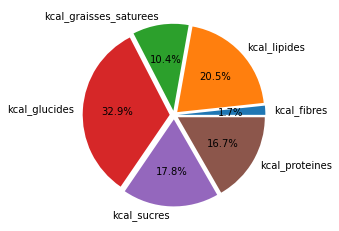

In [526]:
plt.pie(val, labels=lab, explode=[0.05]*len(val), normalize = True, autopct="%.1f%%")

In [527]:
import plotly.graph_objects as go
def jauge(kcal, df_conso, nutriment):
    
    unit=' - kcal'
    
    if nutriment == 'lipides':
        kcal_max = 0.35*kcal
        kcal_min = 0.2*kcal
    elif nutriment == 'graisses_saturees':
        kcal_max = 0.1*kcal
        kcal_min = 0
    elif nutriment == 'glucides':
        kcal_max = 0.65*kcal
        kcal_min = 0.45*kcal
    elif nutriment == 'sucres':
        kcal_max = 0.1*kcal
        kcal_min = 0
    elif nutriment == 'proteines':
        kcal_max = 0.35*kcal
        kcal_min = 0.1*kcal
    elif nutriment == 'kcal':
        kcal_max = kcal * 1.05
        kcal_min = kcal / 1.05
    elif nutriment == 'sel':
        kcal_min=0
        kcal_max=5
        unit=' - g'
    
    if nutriment == 'sel' or nutriment == 'kcal':
        conso = df_conso[nutriment][0]
    else :
        conso = df_conso['kcal_'+nutriment][0]
    
    if conso > kcal_max:
        d_ref=kcal_max
    elif conso < kcal_min:
        d_ref=kcal_min
    else:
        d_ref=conso
    
    fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = conso,
    mode = "gauge+number+delta",
    title = {'text': nutriment+unit},
    delta = {'reference': d_ref, 'increasing': {'color': "red"}, 'decreasing': {'color': "green"}},
    gauge = {'axis': {'range': [None, kcal_max*2]},
             'bar': {'color': "blue"},
             'steps' : [
                 {'range': [0, kcal_min], 'color': "lightgray"},
                 {'range': [kcal_min, kcal_max], 'color': "green"}],
             'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': kcal_max}}))
    fig.update_layout(
        autosize=False,
        width=500,
        height=500,)
    

    fig.show()

In [528]:
jauge(kcal_test,df_total,'lipides')

In [529]:
jauge(kcal_test,df_total,'graisses_saturees')

In [530]:
jauge(kcal_test,df_total,'glucides')

In [531]:
jauge(kcal_test,df_total,'sucres')

In [532]:
jauge(kcal_test,df_total,'sel')

In [533]:
jauge(kcal_test,df_total,'kcal')

In [534]:
jauge(kcal_test,df_total,'proteines')